<font size=5> **Exploratory Data Analysis Examples** </font>

O objetivo deste notebook é demonstrar alguns estudos de caso reais provenientes de cursos realizados ao longo da jornada de aprendizado. Em praticamente todos os casos, um problema de negócio será fornecido e, a partir de Datasets presentes no sistema de arquivos, serão realizados tratamentos específicos no conjunto de dados, preparando e avaliando as mellhores maneiras para responder as questões propostas. Entre os principais pontos abordados neste notebook encontram-se:

* Treinamento dos métodos obtidos através dos estudos;
* Aplicação de conceitos teóricos em situações práticas;
* Exploração de conjuntos de dados reais e práticos;
* Análise de problemas através de plotagem de gráficos;
* Aplicação de estatística descritiva para conclusões;

# Udacity

Nesta sessão, serão abordados os desafios presentes no curso *Fundamentos Data Scientists I* realizado através da plataforma *Udacity*. Os tópicos deste conteúdo englobam a análise de dados em seu caráter exploratório, realizando tratamentos específicos em conjuntos de dados visando sempre a resolução de um problema proposto.

## Cancer: Malignância de Tumores

### Descrição da Análise

Disposto de um Dataset contendo características sobre diversos tumores, serão utilizadas as habilidades aprendidas sobre tratamento de dados para verificar se **a área médio do tumor influencia em sua caracterização como MALIGNO ou BENIGNO**. Para entender melhor sobre este desafio, a próxima célula deste notebook será responsável pela leitura do Dataset e por mostrar uma visão inicial sobre os dados e os atributos.

Link para acesso aos dados: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [ ]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv')
df_cancer.head()

### Preparando Dados

Com o arquivo em mãos, a intenção é avaliar o passo a passo para se chegar ao resultado esperado. Percebe-se que, no conjunto em questão, há uma coluna chamada **diagnosis** responsável por identificar se o tumor é Maligno (M) ou Benigno (B). Como o objetivo, neste caso, é verificar se uma característica numérica (como o raio, por exemplo) influencia nessa classificação, seria interessante ter em mãos dois DataFrames diferentes, seguindo o formato:

* df_b = Dataset com dados apenas de tumores classificados como BENIGNO;
* df_b = Dataset com dados apenas de tumores classificados como MALIGNOS.

Antes dessa operação, é importante conhecer melhor o conjunto de dados.

In [ ]:
# Verificando Dataset
df_cancer.shape

In [ ]:
print(f'Este Dataset possui {df_cancer.shape[0]} linhas e {df_cancer.shape[1]} colunas.')

In [ ]:
# Conhecendo as colunas (atributos) do Dataset
for i, col in enumerate(df_cancer.columns):
    print(f'Coluna {i}: {col}')

In [ ]:
# Verificando tipos de dados
df_cancer.dtypes

Aparentemente todos os dados estão em seus devidos formatos, ou seja, valores numéricos encontram-se com tipo `float64` e valores em formato de texto estão em formato `object` que, na verdade, trata-se de um formato do tipo `str`. Não será necessária nenhuma transformação de dados.

In [ ]:
# Retornando estatísticas sobre os dados
df_cancer.describe()

In [ ]:
# Separando DataFrame 

df_b = df_cancer[df_cancer['diagnosis'] == 'B']
df_m = df_cancer[df_cancer['diagnosis'] == 'M']

In [ ]:
# Verificando alterações
df_b.head()

In [ ]:
df_m.head()

In [ ]:
# Verificando contagem em cada um dos DataFrames
print(f'Amostras de tumores Maligno somam {df_m.shape[0]}.')
print(f'Tumores Benignos totalizam {df_b.shape[0]} amostras.')

In [ ]:
# Selecionando dados de uma única coluna
df_b['area_mean']

In [ ]:
# Retornando a média destes dados
df_m['area_mean'].mean()

In [ ]:
# Comparando média das áreas
print(f'Área média de tumores Malignos: {df_m["area_mean"].mean():.2f}')
print(f'Área média de tumores Benignos: {df_b["area_mean"].mean():.2f}')

Já neste ponto, é possível verificar que a área média de tumores classificados como Malignos são *maiores* é maior que a área média de tumores tidos como Benignos. 

### Conclusões

De acordo com a preparação realizada acima, é possível concluir que a área média dos tumores de alguma forma tem influência em sua malignância. Tumores malignos costumam ser maiores que tumores benignos na grandeza área.

A análise gráfica auxilia na retirada de insights e formalização de conclusões.

In [ ]:
# Importando matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Plotando gráficos
xlabel = range(0, 2501, 500)

# 1 - Distribuição de tumores benignos
df_b['area_mean'].plot(kind='hist', title='Distribuição de Área - Tumores Benignos', xticks=xlabel);

In [ ]:
# 2 - Distribuição de tumores malignos
df_m['area_mean'].plot(kind='hist', title='Distribuição de Área - Tumores Malignos', color='r', xticks=xlabel);

Os gráficos acima mostram que os tumores malignos (vermelho) estão distribuidos mais a direita, ou seja, possuem maiores áreas.

In [ ]:
# Visualizando gráficos em duas janelas
fig, ax = plt.subplots(2, figsize=(9, 9))
ax[0].hist(df_b['area_mean'], label='Benignos');
ax[0].set_title('Distribuição de Área Média de Tumores', fontsize=15)
ax[0].legend()
ax[0].set_xticks(xlabel);
ax[0].set_ylabel('Frequência');

ax[1].hist(df_m['area_mean'], label='Malignos', color='r')
ax[1].legend()
ax[1].set_xticks(xlabel);
ax[1].set_xlabel('Área Média (um²)');
ax[1].set_ylabel('Frequência');

O conjunto de gráficos acima melhora a visualização e confirma a conclusão de que tumores malignos normalmente possuem área maior. Entretanto, ainda é possível melhorar. 

In [ ]:
# Plotando as duas distribuições no mesmo gráfico
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.hist(df_b['area_mean'], alpha=.5, label='Benigno');
ax.hist(df_m['area_mean'], alpha=.5, color='r', label='Maligno');
ax.legend();
ax.set_title('Distribuição de área por tipo de tumor', fontsize=15);
ax.set_xlabel('Área média (um²)');
ax.set_ylabel('Frequência');

## Censo: Ganhos Anuais e Idade

### Descrição da Análise

Munidos de um Dataset contendo uma grande quantidade de informações a respeito do Censo Americano, é feita a seguinte pergunta: **há alguma relação entre o ganho anual e algum outro atributo significante entre os entrevistados?**. Para entender melhor a questão, informações adicionais sobre este conjunto de dados apresentam-se abaixo:


In [ ]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

A coluna que indica os *ganhos anuais* de cada amostra é identificada pela sigla **income**. É necessário reparar que estes dados não estão em formato numérico, como era de se esperar, mas sim em caráter classificatório, ou seja, as amostras estão separadas em ganhos maiores que US50.000,00 ou menores ou iguais a US$50.000,00.

### Preparando e Avaliando Dados

In [ ]:
# Visualizando coluna income
df_census['income'].unique()

In [ ]:
# Visualizando tipos de dados
df_census.dtypes

Aparentemente os tipos de dados estão corretos, ou seja, colunas numéricas possuem dados do tipo `float` ou `int` e, da mesma forma, colunas de texto estão salvas no formato `object` que, lembrando, trata-se de formatos do tipo `string`.

In [ ]:
# Visualizando algumas estatísticas
df_census.describe()

In [ ]:
# Quantidade de linhas e colunas
df_census.shape

In [ ]:
# Há dados faltantes?
df_census.isnull().values.any()

In [ ]:
# Dados duplicados?
df_census.duplicated().any()

Análise sobre dados duplicados: como se trata de dados do Censo Americano, ou seja, pesquisa realizada com cidadãos, é perfeitamente possível que haja dados duplicados. Neste caso, este tipo de duplicação significa que há pessoas com o mesmo atributo, ou seja, idade, educação, ganho, etc...

In [ ]:
# Contando dados duplicados
df_census.duplicated().values.sum()

In [ ]:
"""
Próximas tarefas: separar DataFrames de acordo com os ganhos anuais (income). Realizar análises com outras colunas.
"""

In [ ]:
# Separando DataFrames de acordo com os ganhos anuais
df1 = df_census[df_census['income'] == ' >50K']
df2 = df_census[df_census['income'] == ' <=50K']

In [ ]:
# Verificando alterações
df1.shape

In [ ]:
df2.shape

In [ ]:
# DataFrame com pessoas que ganham acima de 50K
df1.head()

In [ ]:
# DataFrame com pessoas que ganham 50K ou menos
df2.head()

Este tipo de procedimento normalmente é feito utilizando a função `.query()` do Pandas. A sintaxe seguiria o formato:

In [ ]:
# Separando DataFrames com .query()
df1 = df_census.query('income == " >50K"')
df2 = df_census.query('income == " <=50K"')

In [ ]:
# Verificando através de shape (números devem bater com as células acima)
print(f'df1: {df1.shape}')
print(f'df2: {df2.shape}')

### Conclusões

Com os dados devidamente preparados, é possível avaliar quais são os principais atributos que determinam ganhos acima ou abaixo de 50K anuais. Qual a diferença entre o nível de graduação nos dois Datasets?

In [ ]:
# Importando matplotlib

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Ajuda para o gráfico de barras
help(plt.bar)

In [ ]:
# Plotando - Classe Alta
ind = df1['education'].value_counts().index
fig, ax = plt.subplots(figsize=(15, 5))
ax = df1['education'].value_counts()[ind].plot(kind='bar')
plt.xticks(rotation='vertical');
ax.set_title('Níveis de Educação - Classe Alta', fontsize=15)
ax.set_ylabel('Quantidade');
plt.subplots_adjust(bottom=0.2)

In [ ]:
# Plotando - Classe Média/Baixa
fig, ax = plt.subplots(figsize=(15, 5))
ax = df2['education'].value_counts()[ind].plot(kind='bar')
ax.set_title('Níveis de Educação - Classe Média/Baixa', fontsize=15)
ax.set_ylabel('Quantidade');
plt.subplots_adjust(bottom=0.2)

Apesar de favorecerem a comparação, as plotagens acima poderiam ser representadas de maneira diferente, visto que a quantidade de amostras em ambos os datasets é diferente (isto pode ser evidenciado pela diferença no eixo y nos gráficos). O ideal, neste caso, seria representar os valores por porcentagem do total.

In [ ]:
print(f'Amostras em df1: {df1.shape[0]}')
print(f'Amostras em df2: {df2.shape[0]}')

In [ ]:
prop_df1 = 100 * df1['education'].value_counts() / df1.shape[0]
prop_df1

In [ ]:
prop_df2 = 100 * df2['education'].value_counts() / df2.shape[0]
prop_df2

In [ ]:
# Plotando gráficos
import numpy as np

fig, ax = plt.subplots(figsize=(13, 5))
ax = prop_df1[ind].plot(kind='bar')
ax.set_yticks(np.arange(0, 40, 5));
ax.set_ylabel('Porcentagem (%)', fontsize=10)
ax.set_xlabel('Última graduação', fontsize=13)
ax.set_title('Nível de Graduação - Classe Alta', fontsize=15)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = prop_df2[ind].plot(kind='bar')
ax.set_yticks(np.arange(0, 40, 5));
ax.set_ylabel('Porcentagem (%)', fontsize=10)
ax.set_xlabel('Última graduação', fontsize=13)
ax.set_title('Nível de Graduação - Classe Média/Baixa', fontsize=15)
plt.show()

**Considerações:** Após a avaliação gráfica, a diferença entre os níveis de escolaridade entre as Classes Alta e Média/Baixa ficaram evidente. No conjunto de dados com maior condição financeira, diplomas de Doutorado, Mestrado e Bacharelado são mais comuns. O que é visto no conjunto de dados de classe média/baixa é uma maior distribuição em escolaridades fundamentais.

Outra pergunta: **Qual a distribuição de idades de pessoas que ganham mais com relação às que ganham menos?**

In [ ]:
# Verificando colunas
df1.columns

In [ ]:
# Ajuda histograma
help(plt.hist)

In [ ]:
# Plotando
fig, ax = plt.subplots(2, 1, figsize=(13, 9))
for axe in ax:
    axe.set_ylabel('Frequência', fontsize=13)
    axe.set_xticks(np.arange(0, 90, 10))
ax[0].hist(df1['age'], label='Classe Alta', color='b', alpha=.5);
ax[0].set_xticks(np.arange(0, 90, 10));
ax[0].set_title('Distribuição de Idades por Classe', fontsize=15)
ax[0].legend()

ax[1].hist(df2['age'], label='Classe Baixa', color='g', alpha=.5);
ax[1].set_xticks(np.arange(0, 90, 10));
ax[1].set_xlabel('Idade', fontsize=13)
ax[1].legend()

In [ ]:
# Plotando os dois no mesmo objeto figure
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
ax.hist(df1['age'], label='Classe Alta', color='b', alpha=.9)
ax.hist(df2['age'], label='Classe Média/Baixa', color='g', alpha=.4)
ax.set_title('Distribuição de Idades por Classe Social', fontsize=15)
ax.set_ylabel('Frequência', fontsize=12)
ax.set_xlabel('Idade', fontsize=12)
ax.set_xticks(np.arange(0, 90, 10))
ax.legend()
plt.show()

**Considerações:** Os gráficos acima auxiliam na percepção de que, geralmente, pessoas com maior poder aquisitivo (Classe Alta) são mais "velhas" com relação a pessoas com menor poder aquisitivo (Classe Média/Baixa). Este resultado, a princípio, é plausível, visto que a estabilidade financeira normalmente ocorre com o passar do tempo.

## Análise Química de Vinhos: Qualidade

Neste estudo de caso, são apresentados dois Datasets diferentes, cada um contendo informações e características químicas de dois tipos de vinhos: Tinto e Branco. Dispondo de todo o leque de funções oferecidas pelas biblioteca do PyData Stack, propõe-se uma análise para verificar se **a qualidade atribuída a determinado tipo de vinho possui influência de seus demais atributos químicos**. Para manter o costume, este primeiro contato visa a familiarização com os conjuntos de dados oferecidos.

Link: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Avaliando Dados

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd

df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv')
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv')

In [ ]:
# Verificando amostras
df_red.head()

Primeiro desafio já encontrado: O separador padrão para este dataset é **;** e não simplesmente **,** - parâmetro `sep='separador'` deve ser dado.

In [ ]:
# Nova leitura com separador=;
df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv', sep=';')
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv', sep=';')

In [ ]:
# Verificando Vinho Tinto
df_red.head()

In [ ]:
# Verificando Vinho Branco
df_white.head()

In [ ]:
# Quantidade de linhas
print(f'Amostras de Vinho Tinto: {df_red.shape[0]}')
print(f'Amostras de Vinho Branco: {df_white.shape[0]}')

In [ ]:
# Dados nulos?
print(f'Há dados nulos nas amostras de Vinho Tinto?\nR: {df_red.isnull().values.any()}')
print()
print(f'Há dados nulos nas amostras de Vinho Branco?\nR: {df_white.isnull().values.any()}')

In [ ]:
# Dados duplicados?
print(f'Há dados duplicados nas amostras de Vinho Tinto?\nR: {df_red.duplicated().any()}', end='')
print(f' - {df_red.duplicated().values.sum()} dados duplicados.')

In [ ]:
print(f'Há dados duplicados nas amostras de Vinho Branco?\nR: {df_white.duplicated().any()}', end='')
print(f' - {df_white.duplicated().values.sum()} dados duplicados.')

Análise: apesar de haver dados duplicados, em se tratando de propriedades químicas sobre determinada amostra, é perfeitamente possível que dois vinhos diferentes, da mesma categoria, possuam atributos identicos. O range de possibilidades, neste caos, é pequeno, o que dá margem para este tipo de situação. O veredicto é que estes dados duplicados sejam mantidos nos Datasets.

In [ ]:
# Comparando alguns parâmetros entre os tipos de vinhos
df_red.describe()

In [ ]:
df_white.describe()

In [ ]:
# Densidade média
print(f'Densidade média - Vinho Tinto: {df_red["density"].mean():.2f}g/cm³')
print(f'Densidade média - Vinho Branco: {df_white["density"].mean():.2f}g/cm³')

In [ ]:
# pH
print(f'pH médio - Vinho Tinto: {df_red["pH"].mean():.2f}')
print(f'pH médio - Vinho Branco: {df_white["pH"].mean():.2f}')

In [ ]:
# Qualidade
print(f'Índice de Qualidade médio - Vinho Tinto: {df_red["quality"].mean():.2f}')
print(f'Índice de Qualidade médio - Vinho Branco: {df_white["quality"].mean():.2f}')

In [ ]:
df_red.describe()['pH']['mean']

In [ ]:
# Printando todos os atributos
def show_means(df):
    for col in df.describe().columns:
        print(f"Atributo: {col} - média: {df.describe()[col]['mean']:.2f}")

In [ ]:
# Vinho Tinto
show_means(df_red)

In [ ]:
# Vinho Branco
show_means(df_white)

In [ ]:
# Verificando tipos de dados
# Vinho Tinto
df_red.dtypes

In [ ]:
# Vinho Branco
df_white.dtypes

Não será necessária nenhuma conversão de dados.

In [ ]:
# Verificando informações detalhadas
df_red.info()

### Preparando Dados

Após uma breve familiarização com os conjuntos de dados fornecidos, os esforços agora serão voltados para trabalhar no problema a ser resolvido: relacionar a qualidade (nota dada na coluna *quality*) de cada amostra de Vinho com algum atributo em especial. Para isso, o primeiro passo a se fazer é **unir** os dois conjuntos de vinhos, trabalhando com um único conjunto de dados.

Para unir os dois Datasets, antes é necessário realizar alguns procedimentos:

* Criar, em cada um dos Datasets, uma coluna adicional com a respectiva 'cor' ou 'tipo' do Vinho;
* Para realizar este procedimento, é necessário utilizar as funções do objeto array do NumPy;
* Criar um terceiro DataFrame que irá receber a união dos dois DataFrames.

In [ ]:
# Criando array de tipo
import numpy as np

help(np.repeat)

In [ ]:
# Testando
array_red = np.repeat('red', 3)

In [ ]:
array_red

In [ ]:
# Segundo argumento = quantidade de amostras de cada df
array_red = np.repeat('red', df_red.shape[0])
array_red

In [ ]:
array_white = np.repeat('white', df_white.shape[0])
array_white

In [ ]:
# Verificando se as quantidades estão corretas (Resultados têm de ser True)
print(f'Quantidade de amostras batem para Vinho Branco? {array_white.shape[0] == df_white.shape[0]}')
print(f'Quantidade de amostras batem para Vinho Tinto? {array_red.shape[0] == df_red.shape[0]}')

In [ ]:
# Agora que está tudo ok, deve-se adicionar colunas aos respectivos DataFrames
df_red['color'] = array_red
df_white['color'] = array_white

In [ ]:
# Verificando
df_red.head()

In [ ]:
df_white.head()

In [ ]:
# Por fim, deve-se criar um novo objeto DataFrame e unir os dois conjuntos através da função .append()
df_wine = df_red.append(df_white)
df_wine.head()

In [ ]:
# Verificando através da contagem de amostras (Resultado deve ser True)
df_wine.shape[0] == df_red.shape[0] + df_white.shape[0]

Um fato de muita importância durante a fase de preparação dos dados é o nome atribuído às colunas do Dataset. É possível verificar, neste caso, que as colunas que possuem mais de uma palavra por nome contém espaços, o que dificulta o trabalho em algumas situações. Dessa forma, é necessário realizar mais uma alteração neste conjunto de dados.

In [ ]:
# Renomeando colunas
df_wine.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_wine.head(1)

In [ ]:
# Salvando alterações
df_wine.to_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv', index=False)

### Tentativas de Conclusões

Após a completa preparação dos dados, parte-se para a etapa de conclusões. Lembrando que o problema proposto é verificar se a qualidade de cada conjunto de dados está relacionada com alguma característica química específica.

In [ ]:
# Visualizando relações entre todas as variáveis
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

help(pd.plotting.scatter_matrix)

In [ ]:
# Plotando
pd.plotting.scatter_matrix(df_wine, figsize=(18, 18));

Devido a grande quantidade de variáveis, a visão geral sobre as correlações entre os atributos é dificultada. Entretanto, algumas poucas conclusões já podem ser retiradas desta análise preliminar:

* Aparentemente a *qualidade* não possui fortes correlações diretas com nenhum outro atributo;
* Outros atributos, entretanto, possuem correlações entre si (*density* e *fixed_acidity*, *density* e *alcohol*, etc)
* O pH possui correlação negativa com fixed_acidity (conclusão plausível).

Mesmo tendo em vista essas afirmações, é possível avaliar conclusões mais profundas com algumas funções diferencidas do pandas, como é o caso do `groupby()`. Com ela, os dados podem ser agrupados de acordo com determina(s) característica(s).

In [ ]:
# Ajuda
help(pd.DataFrame.groupby)

In [ ]:
# Agrupando por qualidade - média de atributos
df_wine.groupby('quality').mean()

Dois pontos que podem ser percebidos:
* Maiores qualidades estão relacionadas com **baixos** índices de **chlorides**.
* Maiores qualidades estão relacionadas com **baixos** índices de **sulphates**.
* Maiores qualidades estão relacionados com **altos** índices de **alcohol**.

In [ ]:
# Plotando gráfico - Nível Alcoólico
fig, ax = plt.subplots(figsize=(12, 6))
ax = df_wine.groupby('quality').mean()['alcohol'].plot(kind='bar', color='b')
ax.set_title('Nível Alcoólico x Qualidade de Vinhos', fontsize=15)
ax.set_xlabel('Qualidade', fontsize=13)
plt.xticks(rotation='horizontal')
ax.set_ylabel('Nível Alcoólico', fontsize=13)
ax.set_ylim(8, 12.5)
plt.show()

In [ ]:
# Plotando gráfico - Cloretos
fig, ax = plt.subplots(figsize=(12, 6))
ax = df_wine.groupby('quality').mean()['chlorides'].plot(kind='bar', color='g', alpha=.4)
ax.set_title('Relação entre Qualidade do Vinho e nível de Cloretos', fontsize=15, color='b')
ax.set_xlabel('Qualidade', fontsize=13, color='b')
ax.set_ylabel('Nível de Cloreto', fontsize=13, color='b')
plt.grid(True)
plt.show()

Ainda sim, é possível se chegar a mais conclusões através do groupby.

In [ ]:
# Verificando qualidade x tipo de vinho
df_wine.groupby(['quality', 'color']).mean()

In [ ]:
# Agrupando apenas por tipo de vinho
df_wine.groupby('color').mean()

O agrupamento acima evidencia a diferença dos atributos entre os dois tipos de vinho.

**Desafio:** o que poderia ser feito para responder a seguinte pergunta:

A qual categoria de Vinho pertence a maior taxa de vinhos aprovados com a maior nota possível?

In [ ]:
# Verificando maior nota
df_wine['quality'].max()

In [ ]:
# Agrupando entre as duas categorias
df_wine.groupby(['color', 'quality']).mean()

Já é possível verificar, através do agrupamento acima, que os Vinhos Tintos não possuem nenhuma amostra aprovada com nota máxima!

In [ ]:
# Visualizando quantidades
df_wine.groupby(['color', 'quality']).count()

In [ ]:
prop_df = 100 * df_wine.groupby(['color', 'quality']).count() / df_wine.shape[0]

In [ ]:
df_wine.groupby(['color', 'quality']).count().index

In [ ]:
for i in df_wine.groupby(['color', 'quality']).count().index:
    print(i)

In [ ]:
100 * df_wine.groupby(['color', 'quality']).count().loc['red', :] / df_wine.query('color == "red"').shape[0]

Está ficando próximo do resultado almejado... Seguem as tentativas.

In [ ]:
df_prop_red = 100 * df_wine.groupby(['color', 'quality']).count().loc['red', :] / df_wine.query('color == "red"').shape[0]
df_prop_red['color'] = np.repeat('red', df_prop_red.shape[0])

In [ ]:
df_prop_white = 100 * df_wine.groupby(['color', 'quality']).count().loc['white', :] / df_wine.query('color == "white"').shape[0]
df_prop_white['color'] = np.repeat('white', df_prop_white.shape[0])

In [ ]:
df_prop_red

In [ ]:
df_prop_white

In [ ]:
# Perfeito. Basta unir os Datasets
df_prop_wine = df_prop_red.append(df_prop_white)

In [ ]:
# Verificando se está tudo Ok
df_prop_wine.shape[0] == len(df_wine.groupby(['color', 'quality']))

In [ ]:
df_prop_wine.groupby(['color','quality']).mean()

In [ ]:
df_prop_wine[df_prop_wine['color'] == 'red'].iloc[:, 0]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = df_prop_wine[df_prop_wine['color'] == 'red'].iloc[:, 0].plot(kind='bar', color='b')

### Conclusões Definitivas

Após algumas aventuras e tentativas. Abaixo seguirão as conclusões definitivas sobre as análises de Vinho. Questões a serem respondidas:

* <b>P1: Existe um certo tipo de vinho (tinto ou branco) associado a uma melhor qualidade?</b>

Para esta pergunta, é necessário comparar a qualidade média do vinho tinto à qualidade média do vinho branco, com o groupby, agrupando por 'cor' e, depois, encontrando a qualidade média de cada grupo. </b>

* <b>P2: Qual nível de acidez (valor de pH) recebe a classificação média mais alta?</b>

Essa pergunta é mais complicada porque, ao contrário da cor, que possui categorias claras pelas quais você pode agrupar (tinto ou branco), pH é uma variável quantitativa, sem categorias claras. No entanto, existe uma solução simples para isso. É possível criar uma variável categórica de uma variável quantitativa criando suas próprias categorias. A função [Cut do Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) permite que você “corte” os dados em grupos. Usando essa função, crie uma nova coluna chamada nível_acidez com essas categorias.

Níveis de acidez:
* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline 

df_wine = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv')
df_wine.head()

In [ ]:
# Verificando qualidade média por tipo de vinho
df_wine.groupby('color').mean()

In [ ]:
# Puxando coluna 'qualidade'
df_wine.groupby('color').mean()['quality']

In [ ]:
# Comunicando resultados
print(f'Qualidade média dos Vinhos Tinto: {df_wine.groupby("color").mean()["quality"][0]:.2f}')
print(f"Qualidade média dos Vinhos Branco: {df_wine.groupby('color').mean()['quality'][1]:.2f}")

In [ ]:
# Visão gráfica
fig, ax = plt.subplots(figsize=(7, 5))
ax = df_wine.groupby('color').mean()['quality'].plot(kind='bar', color=['r', 'y'], alpha=.5)
ax.set_title('Qualidade Média de Vinhos', fontsize=15)
ax.set_xlabel('Categoria', fontsize=13)
plt.xticks(np.arange(2), ['Tinto', 'Branco'], rotation='horizontal', fontsize=13);
ax.set_ylabel('Qualidade Média', fontsize=12)
ax.set_ylim(5, 6.0)
plt.show()

In [ ]:
# Verificando níveis de acidez com .cut()
df_wine.describe()

Relembrando - Níveis de acidez:
* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

In [ ]:
# Testando cut
pd.cut(np.array([1, 2, 3, 4, 5, 6]), 3)

A função <b>.cut</b> normalmente recebe como argumento um array (ou um objeto do tipo _Series_, ou seja, uma feature/coluna do DataFrame) e o número de "splits" de agrupamento de dados, ou seja, a quantidade de "faixas" ou "ranges" possíveis para classificação dos dados. Adicionalmente, também é possível nomear <b>labels</b> para classificação.

Perceba no exemplo acima que foram passados apenas dois argumentos para a função <b>cut</b>: um array e o número de agrupamentos. A função transformou o array e o agrupou de acordo com os ranges calculados automaticamente. Os dados foram agrupados em ranges:

* entre 0.995 e 2.667
* entre 2.667 e 4.333
* entre 4.333 e 6.000

Foram verficados cada um dos elementos do array [1, 2, 3, 4, 5, 6], agrupando-os no respectivo range, de acordo com seu valor. Em outras palavras, o número 1 (elemento 0) ficou agrupado no primeiro range (0.995 a 2.667), assim como o número 2 (elemento 1). Já o número 3 foi classificado no segundo range (2.667 a 4.333) e assim sucessivamente. Vejamos um exemplo real considerando a coluna "pH". Documentação: [Cut-Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

In [ ]:
# Preparando cut
df_wine.describe()['ph']

In [ ]:
df_wine.describe()['ph']['25%']

In [ ]:
# Agora sim
phs = df_wine.describe()['ph']
bin_edges = [phs['min'], phs['25%'], phs['50%'], phs['75%'], phs['max']]
bin_edges

In [ ]:
# labels
bin_names = ['Alto', 'Moderadamente Alto', 'Médio', 'Baixo']
bin_names

In [ ]:
# Aplicando cut
pd.cut(df_wine['ph'], bin_edges, labels=bin_names)

Funcionou! Porém, os dados foram alterados no DataFrame?


In [ ]:
# Verificando alterações
df_wine.head()

Não. É necessário incluir esta alteração através da criação de uma nova coluna chamada **acidity_level**.

In [ ]:
# Antes de inserir, é de bom grado verificar se a quantidade de linhas são iguais
df_wine.shape[0] == pd.cut(df_wine['ph'], bin_edges, labels=bin_names).shape[0]

In [ ]:
# Criando coluna e inserindo novos dados
df_wine['acidity_level'] = pd.cut(df_wine['ph'], bin_edges, labels=bin_names)

In [ ]:
# Verificando
df_wine.head()

In [ ]:
# Salvando novo dataset
df_wine.to_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-cut-edited.csv', index=False)

Respondendo questão:

<b>P2: Qual nível de acidez (valor de pH) recebe a classificação média mais alta?</b>

In [ ]:
df_wine.groupby('acidity_level').mean()['quality']

In [ ]:
print(f'pHs mais baixos proporcionam maiores notas de Qualidade.')

In [ ]:
# Plotando gráfico
fig, ax = plt.subplots(figsize=(7, 5))
ax = df_wine.groupby('acidity_level').mean()['quality'].plot(kind='bar', color='k', alpha=.5)
ax.set_title('Qualidade por Níveis de Acidez', fontsize=15)
plt.xticks(rotation='horizontal')
ax.set_xlabel('Nível de Acidez', fontsize=13)
ax.set_ylabel('Qualidade', fontsize=13)
ax.set_ylim(5.5, 5.9)
plt.show()

**Vinhos com maior teor alcoólico recebem maiores notas?**

In [ ]:
# Separando DataFrames pela mediana
median = df_wine['alcohol'].median()
median

In [ ]:
# Separando dfs
low_alc = df_wine.query('alcohol < @median')
high_alc = df_wine.query('alcohol >= @median')

In [ ]:
# Verificando
df_wine.shape[0] == (low_alc.shape[0] + high_alc.shape[0])

In [ ]:
# Separando em variáveis para plotar
def bar_plot(tam_x, tam_y, colors, data, title, xlabel, ylabel, ylim):
    fig, ax = plt.subplots(figsize=(tam_x, tam_y))
    ax = data.plot(kind='bar', color=colors, alpha=.7)
    ax.set_title=title
    ax.set_xlabel=xlabel
    ax.set_ylabel=ylabel
    ax.set_ylim=ylim
    plt.xticks(rotation='horizontal')
    plt.show()

In [ ]:
def plt_bar_plot(locations, heights, labels, title, xlabel, ylabel):
    plt.bar(locations, heights, tick_label=labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [ ]:
# Especificando variáveis
tam_x = 8
tam_y = 5
colors = 'k'
data = [low_alc, high_alc]
title='Nível Alcoólico e Qualidade'
xlabel='Nível Alcoólico'
ylabel='Qualidade'
ylim=(0, 10)

bar_plot(tam_x, tam_y, colors, data, title, xlabel, ylabel, ylim)

In [ ]:
locations = [1, 2]
heights = [low_alc['quality'].mean(), high_alc['quality'].mean()]
labels = ['Baixo Teor', 'Alto Teor']
title = 'Índice de Qualidade por Teor Alcoólico'
xlabel = 'Teor Alcoólico'
ylabel = 'Qualidade'

In [ ]:
plt_bar_plot(locations, heights, labels, title, xlabel, ylabel)

**Nesta etapa, o desfio é dar continuidade nos testes realizados na sessão 1.3.3 e plotar um gráfico de barras comparando os índices de qualidade dos dois tipos de vinho, dadas as devidas proporções em cada uma das notas atribuídas**

In [ ]:
# Preparando plotagem - Média de Qualidade por Categoria
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_title('Média de Qualidade por Categoria de Vinho', fontsize=15)
ax.set_xlabel('Categoria', fontsize=15)
ax.set_ylabel('Qualidade', fontsize=15)
ax.bar([1, 2], df_wine.groupby('color').mean()['quality'], color=['red', 'blue'])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Tinto', 'Branco'], fontsize=13)
ax.set_ylim(5, 6.0)
plt.show()

O gráfico acima é bem interessante e consegue evidenciar que vinhos Brancos normalmente atingem notas maiores de qualidade. Entretanto, o objetivo neste ponto é comparar, nota a nota, a porcentagem obtida por cada uma das Categorias.

In [ ]:
# Uma outra forma de deixar o gráfico acima mais apresentável seria através da biblioteca seaborn
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_title('Média de Qualidade por Categoria de Vinho', fontsize=15)
ax.set_xlabel('Categoria', fontsize=15)
ax.set_ylabel('Qualidade', fontsize=15)
ax.bar([1, 2], df_wine.groupby('color').mean()['quality'], color=['red', 'white'])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Tinto', 'Branco'], fontsize=13)
ax.set_ylim(5, 6.0)
# ax.grid(False)
plt.show()

In [ ]:
# Preparando plotagem de contagem por índice de qualidade por categoria
df_wine.groupby(['quality', 'color']).count()

In [ ]:
# Trabalhando com proporção
100 * df_wine.groupby(['quality', 'color']).count() / df_wine.shape[0]

Percebe-se que em TODAS as notas o conjunto de Vinho Branco leva vantagem. Porém isto não representa a realidade, visto que há muito mais amostras classificadas como sendo Vinho Branco do que amostradas classificadas com Vinho Tinto

In [ ]:
print('Amostras classificadas como Vinho Branco: {}'.format(df_wine.query('color == "white"').shape[0]))
print('Amostras classificadas como Vinho Tinto: {}'.format(df_wine.query('color == "red"').shape[0]))

In [ ]:
array = np.arange(0, len(data), 1)

In [ ]:
len(data)

In [ ]:
# Visualizando em formato gráfico
colors = ['red', 'white']
title = 'Porcentagem de notas de qualidade por categoria de Vinho'
locations = [1, 2]
data = 100 * df_wine.groupby(['quality', 'color']).count() / df_wine.shape[0]

fig, ax = plt.subplots(figsize=(10, 5))
ax = data['ph'].plot(kind='bar', color=colors)
ax.set_title(title, fontsize=15)
ax.set_xlabel('Qualidade', fontsize=15)
ax.set_ylabel('Porcentagem (%)', fontsize=15)
plt.show()

Apesar de estar aparentemente OK, o gráfico não reflete a realidade pois há mais amostras de Vinho Branco do que de Vinho Tinto, o que interefere diretamente na contagem. Para resolver este problema, é necessário trabalhar com a <b>proporção</b>, ou seja, realizar a contagem em cada categoria e dividir o valor pelo total.

In [ ]:
df_wine.groupby('color').count()['ph']

In [ ]:
# Dados
colors = ['red', 'white'] * 6
title = 'Porcentagem de notas de qualidade por categoria de Vinho'
x = 'Qualidade'
y = 'Porcentagem (%)'
contagem = df_wine.groupby(['quality', 'color']).count()['ph'] # Total de cada uma das categorias
total = df_wine.groupby('color').count()['ph']
prop = 100 * contagem / total

In [ ]:
# Melhorando gráfico

def plot_wine_quality(dados, eixo_x, eixo_y, titulo, cores):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = dados.plot(kind='bar', color=cores)
    ax.set_title(titulo, fontsize=15)
    ax.set_xlabel(eixo_x, fontsize=15)
    ax.set_ylabel(eixo_y, fontsize=15)
    plt.show()

In [ ]:
plot_wine_quality(prop, x, y, title, colors)

Apesar de estar bem melhor, há alguns pontos a se destacar nesse gráfico.

<b>Análise</b>

* Nas menores classificações (3, 4 e 5), amostras de Vinho Tinto possuem uma maior proporção.
* Em contrapartida, em classificações maiores (6, 7, 8 e 9), amostras de Vinho Branca marcam uma maior presença.

<b>Melhorias</b>

* Rótulos no eixo x se encontram bagunçados
* Seria interessante colocar as barras das respectivas categorias umas do lado das outras
* Não há espaço para amostras de Vinho Tinto com índice de qualidade = 9 (apesar deste número ser 0, deveria constar no gráfico)

*Como há muita customização inclusa, seria muito mais interessante plotar este gráfico diretamente no matplotlib ao invés do pandas*

In [ ]:
# Contagem para cada avaliação de vinho
color_counts = df_wine.groupby(['color', 'quality']).count()['ph']
color_counts

In [ ]:
# Contagem total para cada tipo de vinho
color_total = df_wine.groupby('color').count()['ph']
color_total

In [ ]:
# Obtendo proporções de cada um dos tipos de vinhos
red_proportion = color_counts['red'] / color_total['red']
red_proportion

In [ ]:
# Repetindo para Vinho Branco
white_proportion = color_counts['white'] / color_total['white']
white_proportion

In [ ]:
# Inserindo valor 0 para notas 9 do Vinho Tinto - Isto é necessário para manter igualdade entre os dados
red_proportion['9'] = 0
red_proportion

In [ ]:
# Definindo parâmetros do gráfico
ind = np.arange(len(red_proportion)) # Localização das barras
width = .35 # Largura das barras

ind

In [ ]:
# Plotando barras - Preview
red_bars = plt.bar(ind, red_proportion, width)

In [ ]:
# Continuando
sns.set()
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')

In [ ]:
sns.set()
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')
white_bars = plt.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='Vinho Branco')

In [ ]:
# Plotagem final
sns.set()
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')
white_bars = plt.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='Vinho Branco')

plt.ylabel('Proporção', fontsize=13)
plt.xlabel('Qualidade', fontsize=13)
plt.title('Proporção por Categoria de Vinho e Índice de Qualidade', fontsize=13)
locations = ind + width / 2 # localização dos marcadores no eixo x
labels = ['3', '4', '5', '6', '7', '8', '9']
plt.xticks(locations, labels)
plt.legend()
plt.show()

In [ ]:
# Testando por fig, ax

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')
ax.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='Vinho Branco')
ax.set_title('Proporção de Índice de Qualidade por Categoria de Vinho', fontsize=15)
ax.set_xlabel('Qualidade por Categoria', fontsize=13)
ax.set_ylabel('Proporção', fontsize=13)
locations = ind + width / 2
labels = ['3', '4', '5', '6', '7', '8', '9']
plt.xticks(locations, labels)
plt.legend(fontsize=12)
plt.show()

## Car Test: Economia de Combustível

Em um segundo estudo de caso mais desafiador, a Agência de Proteção Ambiental dos EUA providencia dados relacionados a um estudo de economia de combustível de acordo com diversos modelos de carros, cada qual com seus atributos característicos. Anualmente estes dados são mostrados ao governo e servem como guia para economia de combustívei no geral.

### Entendendo os Dados

A Agência de Proteção Ambiental dos Estados Unidos divulga, periodicamente, dados de economia de combustível coletados a partir de diveresos testes envolvendo diferentes modelos de carros, cada qual com sua característica. Neste estudo de caso, os principais pontos abordados envolvem o tratamento de duas bases, sendo a primeira referente a testes realizados em <b>2008</b> e, a segunda, relacionada a testes realizados em <b>2018</b>.

Link para maiores explicações: https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

Explicações sobre significado de *SmartVehicle*: https://www.epa.gov/greenvehicles/consider-smartway-vehicle

PDF importante a respeito dos atributos tratados: https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf

<b>Entendendo os dados</b>

* *Model* - Fabricante e modelo do veículo
* *Displ* - Deslocamento do motor - o tamanho de um motor em litros
* *Cyl* - O número de cilindros de um motor específico
* *Trans* - Tipo de transmissão e número de marchas
* *Drive* -	Tipo de eixo de tração (2WD = tração em 2 rodas, 4WD = tração nas 4 rodas)
* *Fuel* - Tipo de combustível
* *Cert Region*' - Código da região de certificação
* *Área de vendas*'' - Código da região de certificação
* *Stnd* - Código de normas para emissões de veículos (veja as normas para emissão de veículos aqui)
* *Stnd Description*' -	Descrição das normas para emissões de veículos
* *Underhood ID* -	Número de identificação de 12 dígitos encontrado na etiqueta de emissão sob o capô de todos os veículos. É uma exigência da EPA designar seu “grupo de teste” ou “família do motor”. Isso é explicado em mais detalhes aqui
* *Veh Class* -	Classe do veículo na EPA
* *Air Pollution Score* - Pontuação de poluição do ar (classificação de emissão)
* *City MPG* - Mpg estimado na cidade (milhas/galão)
* *Hwy MPG* - Mpg estimado na estrada (milhas/galão)
* *Cmb MPG* - Mpg combinado estimado (milhas/galão)
* *Greenhouse Gas Score* - Classificação de emissão de gases do efeito estufa
* *SmartWay* - Sim, Não ou Elite
* *Comb CO2*' -	Emissões de CO2 cidade/estrada combinados em gramas por milha

*' Não incluídos no conjunto de dados de 2008*

*'' Não incluídos no conjunto de dados de 2018*

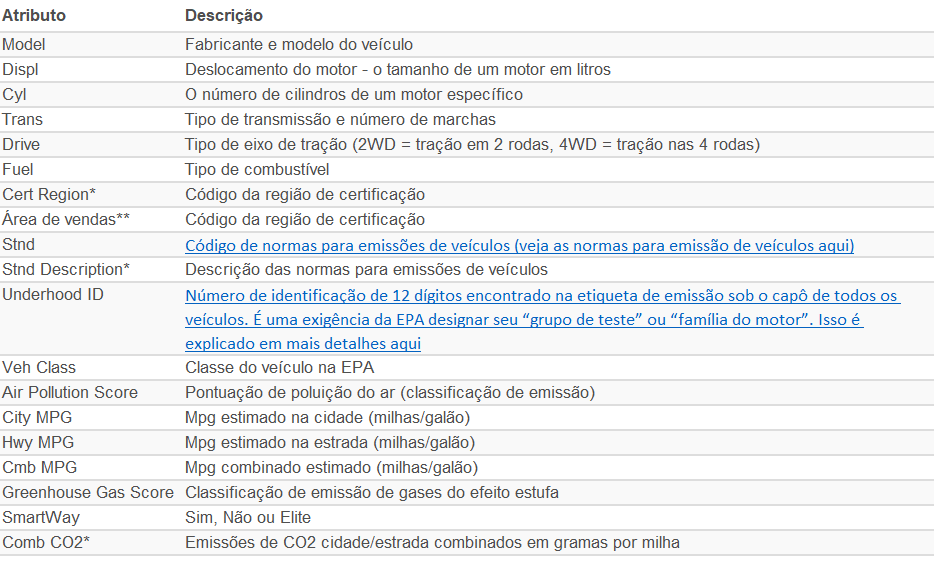

### Avaliando os Dados


In [ ]:
# Importando pandas e lendo arquivos
import pandas as pd

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18.csv')

In [ ]:
# Dados de análises feitas em 2008
df_08.head()

In [ ]:
# Dados provenientes de análises de 2018
df_18.head()

In [ ]:
# Contagem de linhas e colunas
print(f'Estudo de 2008: {df_08.shape[0]} linhas e {df_08.shape[1]} colunas.')
print(f'Estudo de 2018: {df_18.shape[0]} linhas e {df_18.shape[1]} colunas.')

In [ ]:
# Há dados nulos?
df_08.isnull().values.sum()

In [ ]:
df_18.isnull().values.any()

In [ ]:
# Comunicando
print(f'Conjunto de 2008: {df_08.isnull().sum().max()} dados nulos.')
print(f'Conjunto de 2018: {df_18.isnull().sum().max()} dados nulos.')

In [ ]:
# Há dados duplicados?
df_08.duplicated().values.any()

In [ ]:
df_18.duplicated().values.any()

In [ ]:
# Comunicando
print(f'Conjunto de 2008: {df_08.duplicated().values.sum()} dados duplicados.')
print(f'Conjunto de 2018: {df_18.duplicated().values.sum()} dados duplicados.')

In [ ]:
# Verificando tipos de dados
print('Conjunto de 2008:')
df_08.dtypes

In [ ]:
print('Conjunto de 2018: ')
df_18.dtypes

Há uma grande quantidade de dados salvos como `str` e isso precisa ser modificado. Na sessão de Preparação dos Dados estes casos serão tratados.

In [ ]:
# Verificando pontos adicionais

# Dados únicos de algumas colunas
df_08.nunique()

In [ ]:
df_08['Veh Class'].value_counts()

In [ ]:
df_18['Fuel'].value_counts()

Pontos destacados:
* Renomear colunas na forma padrão e excluir excedentes;
* Filtrar dados de acordo com objetivo;
* Remover dados missing;
* Remover dados duplicados;
* Transformar tipos de dados;
* Garantir que ambos os DataFrames possuam as mesmas colunas com os mesmos nomes;
* Excluir colunas (drop) irrelevantes para a análise.

### Preparando Dados

Colocando em prática os tópicos levantados na sessão de Avaliação dos Dados, o primeiro passo é renomear colunas e remover atributos irrelevantes. Para a análise proposta, entende-se por atributos irrelevantes:

* Do conjunto de dados de 2008: *'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'*
* Do conjunto de dados de 2018: *'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'*

In [ ]:
# Verificações antes da exclusão
df_08.shape

In [ ]:
df_08.columns

In [ ]:
df_08.head(1)

In [ ]:
# Removendo colunas
drop_08 = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
df_08.drop(drop_08, axis=1, inplace=True)

In [ ]:
# Verificações
df_08.shape

In [ ]:
df_08.head(1)

In [ ]:
# Realizando mesmo procedimento com dados de 2018
df_18.shape

In [ ]:
df_18.head(1)

In [ ]:
drop_18 = ['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2']
df_18.drop(drop_18, axis=1, inplace=True)
df_18.shape

In [ ]:
df_18.head(1)

In [ ]:
# Renomeando colunas com função .rename()
# 1 - Sales Area em 2008 deveria ser Cert Region (assim como em 2018)
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)
df_08.head(1)

In [ ]:
# Agora é possível aplicar o rename em todas as colunas para deixa-las no formato "padrão"
df_08.columns == df_18.columns

In [ ]:
# Renomeando
df_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [ ]:
df_08.head(1)

In [ ]:
df_18.head(1)

**Filtrando e removendo dados nulos e duplicados**

In [ ]:
# Filtro para captar apenas carros certificados na California (cert_region == CA)
df_08['cert_region'].value_counts()

In [ ]:
df_18['cert_region'].value_counts()

In [ ]:
# Realizando procedimento com .query()
df_08.query('cert_region == "CA"', inplace=True)
df_18.query('cert_region == "CA"', inplace=True)

In [ ]:
# Verificando alterações
df_08['cert_region'].unique()

In [ ]:
df_18['cert_region'].unique()

In [ ]:
# Removendo nulos
df_08.isnull().sum()

In [ ]:
df_18.isnull().sum()

In [ ]:
# Aplicando função .dropna
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [ ]:
# Verificando
print(f'Há dados nulos no conjunto de 2008?\nR: {df_08.isnull().values.any()}')
print(f'Há dados nulos no conjunto de 2018?\nR: {df_18.isnull().values.any()}')

In [ ]:
# Removendo dados duplicados
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [ ]:
# Verificando
print(f'Há dados duplicados no conjunto de 2008?\nR: {df_08.duplicated().any()}')
print(f'Há dados duplicados no conjunto de 2018?\nR: {df_18.duplicated().any()}')

In [ ]:
# Salvando alterações
df_08.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv', index=False)
df_18.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv', index=False)

**Modificando tipos de dados**

In [ ]:
# Verificando tipos de dados em cada um dos datasets
df_08.dtypes

In [ ]:
df_18.dtypes

<b>Tarefas:</b>

<b>Ajustando tipo de dados “cyl.”</b>
* 2008: extrair int da string.
* 2018: transformar float em int.

<b>Ajustar tipo de dados “air_pollution_score”</b>
* 2008: transformar string em float.
* 2018: transformar int em float.

<b>Ajustar tipos de dados “city_mpg”, “hwy_mpg” e “cmb_mpg”</b>
* 2008 e 2018: transformar string em float.

<b>Ajustar tipo de dados “greenhouse_gas_score”</b>
* 2008: transformar float em int.

In [ ]:
# Ajustando coluna cyl - 2008
df_08['cyl'][0]

In [ ]:
# Extraindo número inteiro através da função .str.extract
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

Referência: https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas

In [ ]:
df_08['cyl'][0]

In [ ]:
type(df_08['cyl'][0])

In [ ]:
# Ajustando coluna cyl - 2018
df_18['cyl'][1]

In [ ]:
type(df_18['cyl'][1])

In [ ]:
df_18['cyl'] = df_18['cyl'].astype(int)

In [ ]:
type(df_18['cyl'][1])

<b>Ajustar tipo de dados “air_pollution_score”</b>
* 2008: transformar string em float.
* 2018: transformar int em float.

In [ ]:
# Facilitando
apc = 'air_pollution_score'
print(f'Antes da conversão - Tipo: {type(df_08[apc][0])}')
df_08[apc] = df_08[apc].astype(float)
print(f'Depois da conversão - Tipo: {type(df_08[apc][0])}')

Aparentemente foi encontrado um erro peculiar. A mensagem diz que não foi possível converter a string "6/4" em `float`. Parece que há alguns dados 'estranhos' no Dataset. Investigando...

In [ ]:
# Como está a coluna air_pollution_score?
df_08[apc].value_counts()

In [ ]:
# Verificando linha do referido elemento
x = (df_08[apc] == '6/4').values
np.where(x == True)

Referências:
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
* https://stackoverflow.com/questions/18079029/index-of-element-in-numpy-array

In [ ]:
# Verificando a linha em questão
df_08.iloc[582]

<b>Não é só o nível de poluição do ar a ter dados "duplos"!</b>

As colunas mpg e os nível de gases de efeito estufa também parecem ter o mesmo problema - talvez seja por isso que todos eles foram salvos como strings! Segundo [este link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), que eu encontrei na documentação em PDF:

    "Se um veículo pode operar com mais de um tipo de combustível, uma estimativa é fornecida para cada tipo de combustível."
    
Ahh.. então todos veículos com mais de um tipo de combustível, ou híbridos, como aquele visto acima (que usa etanol E gás) terão uma string que armazena dois valores - um para cada. Isto é um pouco complicado, então eu vou mostrar como fazê-lo com o conjunto de dados de 2008, para você então tentar fazer o mesmo com o conjunto de dados de 2018.

In [ ]:
# Quando há mais de um combustível, há dados duplos
df_08['fuel'].value_counts()

In [ ]:
# Series a ser usada como máscara para selecionar carros híbridos (mais de um combustível)
df_08['fuel'].str.contains('/')

In [ ]:
# Obtendo carros híbridos de 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08.head()

In [ ]:
# Em 2008 há apenas 1 carro híbrido. E em 2018?
df_18['fuel'].str.contains('/').values.sum()

In [ ]:
# Obtendo carros híbridos de 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head()

Neste momento, deve-se **Splitar** ou **Separar** os DataFrames em dois novos conjuntos contendo, cada qual, informações anteriores e posteriores às barras.

In [ ]:
# Criando cópias dos DataFrames para posterior separação
df1_08 = hb_08.copy()
df2_08 = hb_08.copy()
df1_18 = hb_18.copy()
df2_18 = hb_18.copy()

In [ ]:
# Verificando como funciona o split
df1_08['fuel']

In [ ]:
df1_08['fuel'][582]

In [ ]:
df1_08['fuel'][582].split('/')

In [ ]:
print(f'Primeiro elemento: {df1_08["fuel"][582].split("/")[0]}')
print(f'Segundo elemento: {df1_08["fuel"][582].split("/")[1]}')

Repetir a ideia do procedimento acima para as demais colunas.

In [ ]:
# Função para separar os dados
def spliting_df(df1, df2, columns):
    for col in columns:
        df1[col] = df1[col].apply(lambda x: x.split('/')[0])
        df2[col] = df2[col].apply(lambda x: x.split('/')[1])

In [ ]:
# Verificando colunas a serem splitadas no DataFrame de 2008
hb_08.head(1)

In [ ]:
# Salvando colunas
columns_08 = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

In [ ]:
# Verificando colunas a serem splitadas no DataFrame de 2018
hb_18.head(1)

In [ ]:
# Salvando colunas
columns_18 = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

In [ ]:
# Aplicando função aos Datasets (2008)
spliting_df(df1_08, df2_08, columns_08)

In [ ]:
# Verificando resultado
df1_08.head()

In [ ]:
df2_08.head()

In [ ]:
hb_08.head()

Perfeito! Repetindo processo para o conjunto de 2018.

In [ ]:
spliting_df(df1_18, df2_18, columns_18)

In [ ]:
# Verificando
df1_18.head(1)

In [ ]:
df2_18.head(1)

In [ ]:
hb_18.head(1)

Muito bem. O próximo passo é unir os DataFrames para depois colocá-los novamente ao conjunto original.

In [ ]:
# Novas linhas splitadas
df_08_new_rows = df1_08.append(df2_08)
df_18_new_rows = df1_18.append(df2_18)

In [ ]:
# Verificando append por quantidade de linhas
print(f'Conjunto de 2008 - Número de linhas batem?\nR: {df_08_new_rows.shape[0] == df1_08.shape[0] + df2_08.shape[0]}')
print(f'Conjunto de 2018 - Número de linhas batem?\nR: {df_18_new_rows.shape[0] == df1_18.shape[0] + df2_18.shape[0]}')

In [ ]:
# Antes de conerter, é necessário eliminar as linhas originais que causavam problema
df_08.drop(hb_08.index, inplace=True)
df_18.drop(hb_18.index, inplace=True)

In [ ]:
# Verificando linhas dos conjuntos originais antes da junção
print(f'2008: {df_08.shape[0]} linhas.\n2018: {df_18.shape[0]} linhas.')

In [ ]:
# Realizando junção com os conjuntos originais.
df_08 = df_08.append(df_08_new_rows)
df_18 = df_18.append(df_18_new_rows)

In [ ]:
# Verificando linhas após a junção
print(f'2008: {df_08.shape[0]} linhas.\n2018: {df_18.shape[0]} linhas.')

In [ ]:
# Verificando 2018 - linhas de df_18_new_rows devem ser iguais a 870 - 784
(870-794) == df_18_new_rows.shape[0]

In [ ]:
# Por fim, voltando à tarefa original, pode-se converter air_pollution_score tranquilamente
type(df_08[apc][0])

In [ ]:
# Convertendo 
df_08[apc] = df_08[apc].astype(float)
df_18[apc] = df_18[apc].astype(float)

**Ajustar tipos de dado “city_mpg”, “hwy_mpg” e “cmb_mpg”**

* 2008 e 2018: transformar string em float.

In [ ]:
# Convertendo
convert_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

def string_to_float(df, cols):
    for c in cols:
        df[c] = df[c].astype(float)

string_to_float(df_08, convert_columns)
string_to_float(df_18, convert_columns)

In [ ]:
# Verificando
df_08.dtypes

In [ ]:
df_18.dtypes

**Ajustar tipo de dado “greenhouse_gas_score”**
* 2008: transformar float em int.

In [ ]:
ggc = 'greenhouse_gas_score'
df_08[ggc] = df_08[ggc].astype(int)
df_18[ggc] = df_18[ggc].astype(int)

In [ ]:
print(f'Tipo ggc 2008: {type(df_08[ggc][0])}')
print(f'Tipo ggc 2018: {type(df_18[ggc][1])}')

In [ ]:
# Verificações finais
df_08.dtypes

In [ ]:
df_18.dtypes

In [ ]:
# Salvando alterações
df_08.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-editedtypes.csv', index=False)
df_18.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-editedtypes.csv', index=False)

### Exploração Gráfica

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-editedtypes.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-editedtypes.csv')

Link essencial: https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html

**Visão 1:** Distribuição de emissão de Gases Efeito Estufa (ggc) nos dois anos alvos da análise

In [ ]:
# Plotando 2008
ggc = 'greenhouse_gas_score'
sns.set()
sns.distplot(df_08[ggc], bins=10);

In [ ]:
# Plotando gráficos com Seaborn - KDE
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.kdeplot(df_08[ggc], shade=True, label='2008');
sns.kdeplot(df_18[ggc], shade=True, label='2018', color='g');
ax.set_title('Distribuição de Nível de Emissão de Gases', fontsize=15)
ax.set_xlabel('Índice de Emissão', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
plt.show()

Explicações sobre kde (distribuição não parametrizada): http://seaborn.pydata.org/tutorial/distributions.html

*Conclusão*: A partir da distribuição kde não parametrizada plotada acima, é possível inferir que os veículos de 2018 submetidos ao teste geralmente emitem menos gases de efeito estufa.

**Visão 2:** Distribuição de economia de combustível (comb_mpg) nos dois anos alvos da análise. Lembrando que a variável `comb_mpg` representa um gasto combinado de *milhas por galão*, o que seria, traduzindo à realidade brasileira, seria uma espécie de *km por litro* de combustível.

In [ ]:
# Plotando visões com seaborn
sns.distplot(df_08['cmb_mpg']);
sns.distplot(df_18['cmb_mpg']);

In [ ]:
# Aprimorando plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df_08['cmb_mpg'], kde=False, bins=15, label='2008')
sns.distplot(df_18['cmb_mpg'], kde=False, bins=15, label='2018')
ax.set_title('Distribuição de MPG em 2008 e 2018', fontsize=15)
ax.set_ylabel('Frequência')
ax.set_xlabel('Gasto MPG de veículos')
plt.legend(fontsize=13)
plt.show()

*Conclusões:* Veículos de 2018 conseguem realizar trajetos maiores com uma menor quantidade de combustível, ou seja, possuem um maior índice de MPG (Km/L). Isso pode ser explicado pelo surgimento e adaptação de uma grande quantidade de veículos elétricos e movidos a fontes alternativas de energia, fato que, em 2008, era pouco presente.

**Visão 3:** Há correlação entre as variáveis `cyl` (cilindradas do veículo) e `greenhouse_gas_score` (índice de emissão de gases efeito estufa)?

In [ ]:
ggc = 'greenhouse_gas_score'

# Plotando via matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=df_18[ggc], y=df_18['cyl'])
ax.set_title('Correlação entre Cilindradas e Emissão de Gases', fontsize=13)
ax.set_xlabel('Emissão de Gases Efeito Estufa')
ax.set_ylabel('Cilindradas')

In [ ]:
# PLotando via Seaborn
sns.jointplot(x=ggc, y='cyl', data=df_18, kind='reg', marginal_kws=dict(bins=6, rug=True));
plt.ylabel('Cilindradas', fontsize=15)
plt.xlabel('Nível de Emissão de Gases', fontsize=15)
#plt.yticks(np.arange(0, 11, 2.5))
plt.show()

*Conclusão*: Há uma correlação negativa entre o Nível de Emissão de Gases Efeito Estuda e o valor de Cilindradas do veículo. Quanto maior o valor de Cilindradas, menor o nível de emissão de gases.

### Conclusões Definitivas

Após a visualização de algumas relações através de funcionalidades gráficas, entende-se por Conclusões Definitivas o caminho para resposta de algumas perguntas

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-editedtypes.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-editedtypes.csv')

<b>Q1: Existem mais modelos únicos usando fontes alternativas de combustível? Em qual proporção?</b> 

In [ ]:
# Realizando testes com veículos e tipos de combustível
df_08['fuel'].unique()

In [ ]:
df_08['fuel'].value_counts()

In [ ]:
df_18['fuel'].value_counts()

In [ ]:
def calc_fuel_prop(df):
    total = df.shape[0]
    for fuel in df['fuel'].unique():
        print('Combustível: {} - Quantidade: {:.5f}%'.format(
                        fuel, 100*df.query('fuel == @fuel')['fuel'].count()/total))

In [ ]:
print('Proporções em 2008:')
calc_fuel_prop(df_08)
print()
print('Proporções em 2018:')
calc_fuel_prop(df_18)

Resposta: Houve um aumento efetivo na utilização de fontes renováveis de combustível em 10 anos.

<b>Q2: Qual foi o nível de melhoria das classes de veículo no quesito "economia de combustível"?</b>

In [ ]:
# Economia de combustível = cmb_mpg
df_08['cmb_mpg'].mean()

In [ ]:
df_18['cmb_mpg'].mean()

In [ ]:
# Referendando por classe
df_08['veh_class'].unique()

In [ ]:
# Talvez o groupby ajude
df_08.groupby('veh_class').mean()['cmb_mpg']

In [ ]:
# Em 2018...
df_18.groupby('veh_class').mean()['cmb_mpg']

In [ ]:
# Entretanto, deve-se comparar apenas classes de 2018 que TAMBÉM estão presentes em 2008
columns = [x for x in df_18['veh_class'].unique() if x in df_08['veh_class'].unique()]
columns

In [ ]:
df_08_vclass = df_08.query('veh_class == @columns').groupby('veh_class').mean()['cmb_mpg']
df_08_vclass

In [ ]:
df_18_vclass = df_18.query('veh_class == @columns').groupby('veh_class').mean()['cmb_mpg']
df_18_vclass

In [ ]:
for i, v in df_18_vclass.items():
    print(i, v)

In [ ]:
len(df_18_vclass.index)

In [ ]:
# Agora a função já pode ser preparada
def compare_vclass(df1, df2):
    print('Evolução do índice Km/L em 10 anos.\n')
    i = 0
    while i < len(df1.index):
        print('Modelo: {}'.format(df1.index[i]))
        print('2008: {:.2f}\n2018: {:.2f}'.format(df1[i], df2[i]))
        i += 1

compare_vclass(df_08_vclass, df_18_vclass)

In [ ]:
# É possível plotar isso graficamente
ind = np.arange(len(df_18_vclass))
width = .35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(ind, df_08_vclass, width, alpha=.7, label='2008')
ax.bar(ind+width, df_18_vclass, width, alpha=.7, label='2018')
ax.set_title('Melhora na Economia de Combustível ao Longo dos Anos', fontsize=16)
ax.set_xlabel('Categoria de Veículo', fontsize=13)
ax.set_ylabel('Milhas por Galão de Combustível', fontsize=13)
locations = ind + width / 2
labels = df_18_vclass.index
plt.xticks(locations, labels)
plt.legend()
plt.show()

# Data Science Academy

Os estudos não podem parar! De acordo com o avanço no curso de Python Fundamentos para Análise de Dados na plataforma DSA, chegou o momento de documentar as análises exploratórias em um Jupyter Notebook. Muito provavelmente, poucos estudos de casos serão utilizados com EDA puro, uma vez que a DSA introduz rapidamente conceitos de Machine Learning.

## Mercado de Trabalho: Programadores de Softwares

Neste tópico, são apresentados dados reais de uma pesquisa recente nos EUA sobre o mercado de trabalho para Programadores de Softwares. O objetivo é investigar a base e verificar as operações necessárias para limpeza e preparação dos dados. Posteriormente, serão aplicadas algumas técnicas para retiradas de insights.

### Avaliando os Dados

In [ ]:
# Importando bibliotecas necessárias e lendo arquivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys # Ajuda a criar cores para os gráficos
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/dados-pesquisa.csv')

In [ ]:
# Aparentemente será necessário especificar mais alguns parâmetros
df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/dados-pesquisa.csv', low_memory=False)

In [ ]:
# Verificando cabeçalho
df.head()

Pela descrição acima, há 113 colunas no Dataset! 

In [ ]:
# Verificando linhas e colunas do Dataset
print(f'O Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

**Ponto:** Como trata-se de um Dataset gigantesco, muito provavelmente serão encontrados Dados Nulos e qualquer outro tipo de incoerência. Ademais, é relativamente difícil entender o significado de 113 colunas! Dessa forma, serão analisados apenas aspectos pontuais em algumas colunas. Apenas alguns atributos serão avaliados, sendo estes:

* **Age** - Define a idade dos pesquisados;
* **Gender** - Define o gênero dos pesquisados;
* **JobRoleInterest** - Define a área de trabalho de desejo dos pesquisados;
* **EmploymentField** - Define a área na qual o pesquisado está empregado;
* **JobPref** - Define o tipo preferido de trabalho dos pesquisados;
* **JobRealocateYesNo** - Define se o pesquisado tem interesse em ser realocado de área;
* **HoursLearning** - Define a quantidade de horas em que cada pesquisado dedica para cursos/estudos;
* **ExpectedEarning** - Define quanto os pesquisados esperam ganhar no futuro;

In [ ]:
# Printando colunas
for col in df.columns:
    print(col, end=', ')

In [ ]:
# Verificando estatísticas
df.describe()

In [ ]:
# Verificando média de idade
print(f'A média de idade dos pesquisados é de aproximadamente {round(df["Age"].mean())} anos.')

In [ ]:
# Função para retornar quantidade de valores em uma coluna em específico
def col_describe(df, col_name):
    spacing = 0
    column_values = df[col_name.strip()].value_counts()
    if column_values.index.dtype == 'O':
        for instance in column_values.index:
            if len(instance) > spacing:
                spacing = len(instance) + 5
    for instance in column_values.index:
        print(f'{instance:<{spacing}} - {column_values[instance]}')

In [ ]:
# Verificando dados sobre atributo Gender
col_describe(df, 'Gender')

In [ ]:
# Verificando dados sobre atributo SchoolDegree
col_describe(df, 'SchoolDegree')

In [ ]:
# Verificando dados sobre JobRoleInterest
col_describe(df, 'JobRoleInterest')

In [ ]:
# Verificando dados sobre EmploymentField
col_describe(df, 'EmploymentField')

In [ ]:
# Verificando dados sobre JobPref
col_describe(df, 'JobPref')

In [ ]:
# Verificando dados sobre MoneyForLearning (atributo numérico)
col_describe(df, 'MoneyForLearning')

### Preparando os Dados

A primeira coisa que poderia ser feita neste Dataset é criar uma nova coluna com os _Ranges de Idades_, ou seja, aplicar uma regra que classifica os pesquisados de acordo com a idade, utilizando para isso, a função ```cut()``` do Pandas.

In [ ]:
# Para facilitar a vida, vamos criar um novo DataFrame apenas com as colunas desejadas
df = df.loc[:, ['Age', 'Gender', 'JobRoleInterest', 'EmploymentField', 'JobPref', 'JobRelocateYesNo', 'HoursLearning', 'ExcepectedEarning', 'SchoolDegree']]
df.head()

In [ ]:
# Verificando tipos primitivos
df.dtypes

In [ ]:
# JobRealocateYesNo = float64?
print(f'Total de linhas do df: {df.shape[0]}')
print(f'Linhas nulas em JobRealocateYesNo: {df["JobRelocateYesNo"].isnull().values.sum()}')

In [ ]:
# Verificando exemplos de dados não nulos
df[df['JobRelocateYesNo'].isnull() == False].head()

In [ ]:
# Quais as entradas possíveis para JobRelocateYesNo?
df['JobRelocateYesNo'].value_counts()

**Avaliando coluna Age**

In [ ]:
# Dados sobre a coluna Age
df['Age'].describe()

Antes, vamos testar a função ```apply()``` do Pandas.

In [ ]:
# Verificando idades antes do apply
df['Age'].head()

In [ ]:
# Somando um inteiro em todas as idades
df_teste = df.copy()
df_teste['Age'] = df_teste['Age'].apply(lambda x: x+10)

In [ ]:
# Verificando idades após o apply
df_teste['Age'].head()

In [ ]:
# A média teria que ter sido acrescida em 10 unidades
print(f'Média de idades anterior: {df["Age"].mean():.2f} anos.')
print(f'Média de idades após o apply: {df_teste["Age"].mean():.2f} anos.')
print(f'Diferença: {(df_teste["Age"].mean() - df["Age"].mean()):.2f} anos')

In [ ]:
# Aplicando cut e criando uma nova coluna
bins = [0, 20, 30, 40, 50, 60, 90]
labels = ['< 20', '20-30', '30-40', '40-50', '50-60', '> 60']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=labels)

In [ ]:
# Verificando resultado
df.iloc[:, np.r_[0, -1]].head()

In [ ]:
# Há dados nulos em ambas as colunas?
df['Age'].isnull().values.sum()

In [ ]:
df['AgeRange'].isnull().any()

In [ ]:
# O que será que aconteceu na coluna AgeRange nestes 2007 dados nulos?
df[df['Age'].isnull()].iloc[:5, np.r_[0, -1]]

In [ ]:
# Testando crosstab
agerange_jobpref = pd.crosstab(df['AgeRange'], df['JobPref'])

In [ ]:
agerange_jobpref.head()

In [ ]:
# Cruzando dados e inserindo as médias
agerange_jobpref = pd.crosstab(df['AgeRange'], df['JobPref']).apply(lambda x: x/x.sum(), axis=1)

In [ ]:
agerange_jobpref

In [ ]:
# Verificando suspeita de proporcionalidade
agerange_jobpref.iloc[1, :].sum()

In [ ]:
# Verificando suspeita de não proporcionalidade
agerange_jobpref['freelance '].sum()

O novo DataFrame agerange_jobpref criado será útil para plotagens gráficas futuras.

In [ ]:
# Testando crosstab entre AgeRange e JobRelocateYesNo
agerange_jobrelocate = pd.crosstab(df['AgeRange'], df['JobRelocateYesNo']).apply(lambda x: x/x.sum())
agerange_jobrelocate

### Exploração Gráfica

**Distribuição de gêneros entre os participantes da pesquisa**

In [ ]:
# Importando bibliotecas necessárias e lendo arquivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys # Ajuda a criar cores para os gráficos
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/dados-pesquisa.csv')
df.head()

In [ ]:
# Definindo quantidades e labels
values = df['Gender'].value_counts()
labels = values.index
num = len(labels)

# Criando lista de cores
listaHSV = [(x*3/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de pizza
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(values, colors=listaRGB, startangle=90, labels=labels, explode=explode, autopct='%1.1f%%')
plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=12)
ax.axis('equal')
ax.set_title('Proporção de Gêneros na Pesquisa', fontsize=17)
plt.setp(texts, size=0)
plt.setp(autotexts[2:], size=0)
plt.setp(autotexts[:2], size=23, color='w', weight='bold')
plt.show()

""" **Distribuição de Carreiras de Interesse entre os entrevistados** """

In [ ]:
# Definindo labels e quantidades
qtds = df['JobRoleInterest'].value_counts()
labels = qtds.index

# Lista de cores
listaHSV = [(x*2/num, 0.4, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de pizza
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(qtds, labels=labels, startangle=90, autopct='%1.1f%%', colors=listaRGB, shadow=False)
plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=12)
plt.setp(texts, visible=False)
plt.title('Carreiras de Interesse', fontsize=18, weight='bold')
plt.setp(autotexts[-4:], visible=False)
plt.setp(autotexts[:-4], size=15, color='w')
plt.show()

** Carreiras dos entrevistados **

In [ ]:
# Testando - Labels
labels = df['EmploymentField'].value_counts().index
labels

In [ ]:
# Testando - Valores
values = df['EmploymentField'].value_counts()
values

In [ ]:
print(plt.style.available)

In [ ]:
# Gráfico de pizza - 5 primeiras áreas

# Criando figure do matplotlib
fig, ax = plt.subplots(figsize=(7, 7))

# Customizando parâmetros gráficos
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

# Plotando gráfico
ax.pie(values, labels=labels, startangle=90, colors=colors)
plt.show()

**Avaliação**: O gráfico possui muitos labels e, portanto, resulta em uma imagem de difícil interpretação. É possível criar um label chamado _Other_ e somar aquilo que não é tão importante.

Fonte útil: https://blog.algorexhealth.com/2018/03/almost-10-pie-charts-in-10-python-libraries/

In [ ]:
# Lendo valores e labels
values = df['EmploymentField'].value_counts()
labels = values.index
values

In [ ]:
# Testando agrupamento
df_grouped = df.groupby('EmploymentField').count()
df_grouped

In [ ]:
# Testando limite de corte pct_value
pct_value = df_grouped[lambda df: df.columns[0]].quantile(.65)
pct_value

In [ ]:
# Valores abaixo do limite de corte
values_below_pct_value = df_grouped[lambda df: df.columns[0]].loc[lambda s: s < pct_value]
values_below_pct_value

In [ ]:
# Criando coluna Other
def fix_values(row):
    if row['EmploymentField'] in values_below_pct_value:
        row['EmploymentField'] = 'Other'
    return row
df_ok = df.apply(fix_values, axis=1).groupby('EmploymentField').count()
df_ok

In [ ]:
# Criando função detalhada para somar valores pequenos em coluna "Outros"
def agrupando_menores_valores(df, atributo, percent_corte):
    contagem_valores = df.groupby(atributo).count()[df.columns[0]]
    limiar = contagem_valores.quantile(percent_corte)
    abaixo_do_limiar = contagem_valores.loc[lambda s: s < limiar].index.values
    def fixar_valores(linha):
        if linha[atributo] in abaixo_do_limiar:
            linha[atributo] = 'Other'
        return linha
    df_grouped = df.apply(fixar_valores, axis=1).groupby(atributo).count()
    return df_grouped

In [ ]:
df_limiar = agrupando_menores_valores(df, 'EmploymentField', .65)
df_limiar

In [ ]:
# Refazendo gráfico
fig, ax = plt.subplots(figsize=(7, 7))
values = df_limiar[df.columns[0]]
labels = values.index

# Customizando parâmetros colorimétricos
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]

# Plotando gráfico
wedge, texts, autotexts = ax.pie(values, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%')

# Customizando parâmetros gráficos
plt.title('Área de Atuação dos Entrevistados', fontsize=19)
plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=10)
plt.setp(autotexts, color='black')
plt.show()

**Plotando dois gráficos em uma única figure**

In [ ]:
# Aprimorando função para retornar valores e labels
def agrupando_menores_valores(df, atributo, percent_corte):
    if percent_corte == 0:
        values = df.groupby(atributo).count()[df.columns[0]]
        labels = values.index
        return values, labels
    contagem_valores = df.groupby(atributo).count()[df.columns[0]]
    limiar = contagem_valores.quantile(percent_corte)
    abaixo_do_limiar = contagem_valores.loc[lambda s: s < limiar].index.values
    def fixar_valores(linha):
        if linha[atributo] in abaixo_do_limiar:
            linha[atributo] = 'Other'
        return linha
    values = df.apply(fixar_valores, axis=1).groupby(atributo).count()[df.columns[0]]
    labels = values.index 
    return values, labels

In [ ]:
def df_pie_plot(axe, atributo, titulo, percent):
    # Parâmetros
    values, labels = agrupando_menores_valores(df, atributo, percent)
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, 11)]

    # Plotando gráfico
    wedges, texts, autotexts = axe.pie(values, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%')

    # Customizando gráfico
    axe.set_title(titulo, fontsize=15)
    #axe.legend(bbox_to_anchor = (0.95,0.90), fontsize=10)
    axe.legend(loc='lower left', fontsize=10)
    plt.setp(autotexts, color='black')
    plt.setp(texts, visible=False)

In [ ]:
# Definindo figures
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
df_pie_plot(ax[0], 'EmploymentField', 'Área de Atuação dos Entrevistados', .65)
df_pie_plot(ax[1], 'JobPref', 'Modo de Atuação dos Entrevistados', 0)
plt.show()

In [ ]:
# Aprimorando gráfico de pizza com plotly (SchoolDegree)
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
plotly.tools.set_credentials_file(username='thipanini', api_key='ugE5bTPzMMeqUwqKeQdB')

In [ ]:
# Verificando atributo SchoolsDegree
df['SchoolDegree'].value_counts()

In [ ]:
# Configurando dados através da função de agrupamento
values, labels = agrupando_menores_valores(df, 'SchoolDegree', .35)

# Plotando gráfico
school_pie = go.Pie(labels=labels, values=values, 
                    marker=dict(line=dict(color='#FFF', width=2)))

layout = go.Layout(height=800, width=800, autosize=False, title='Nível de Escolaridade dos Entrevistados')
fig = go.Figure(data=[school_pie], layout=layout)
py.iplot(fig, filename='school_pie')

In [ ]:
# Salvando dados
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/dados-pesquisa.csv', index=False)

Vimos, no começo da sessão 2.1.3.1, o seguinte gráfico de gêneros

In [ ]:
# Utilizando seaborn - Área de Interesse
values = df['JobRoleInterest'].value_counts()
labels = values.index
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(9, 6))

sns.barplot(x=values.values, y=labels, palette='Spectral')
plt.title('Áreas de interesse dos entrevistados', fontsize=17)
ax.set_xlabel('Contagem', fontsize=14)
ax.set_ylabel('Área', fontsize=14)
plt.show()

Aprimorando as plotagens em forma de barra, é possível relacionar o modo de atuação dos entrevistados com os ranges de idades obtidos pela coluna _AgeRange_.

In [ ]:
# Verificando ambas as colunas
df['AgeRange'].value_counts()

In [ ]:
df['JobPref'].value_counts()

In [ ]:
# Utilizando o crosstab para realizar uma transformação mágica no DataFrame
df_agejob = pd.crosstab(df['AgeRange'], df['JobPref'])
df_agejob

In [ ]:
# Para ficar ideal, vamos aplicar uma regra que retorna a média de cada um dos valores para o DataFrame
df_agejob = pd.crosstab(df['AgeRange'], df['JobPref']).apply(lambda x: x/x.sum(), axis=1)
df_agejob

In [ ]:
# Agora temos a média considerando o total de JobPref
df_agejob.iloc[0, :].sum()

In [ ]:
# Plotando valores em gráfico de barras
sns.set_style('white')

# Definindo quantidades
num = df_agejob.shape[0]
ind = np.arange(num)
width = .35

# Gráfico de Barras (Stacked)
df_agejob.plot(kind='bar', stacked=True)

# Definindo eixos
plt.title('Preferências de Carreira por Faixa Etária', fontsize=15)
plt.ylabel('Proporção', fontsize=13, labelpad=10)
plt.xlabel('Faixa Etária', fontsize=15, labelpad=20)
plt.xticks(ind, df_agejob.index, fontsize=13)
plt.legend(bbox_to_anchor = (1.05,0.90), fontsize=12)
plt.show()

Em caso de atributos com muitos dados diferentes, como EmploymentField, o ideal é traçar um gráfico de barras sem que haja agrupamento de valores

In [ ]:
# Verificando valores possíveis
df['EmploymentField'].value_counts()

In [ ]:
# Exemplo holoviews
import holoviews as hv
hv.extension('bokeh','matplotlib')
macro_df = pd.read_csv('http://assets.holoviews.org/macro.csv', '\t')
key_dimensions   = [('year', 'Year'), ('country', 'Country')]
value_dimensions = [('unem', 'Unemployment'), ('capmob', 'Capital Mobility'),
                    ('gdp', 'GDP Growth'), ('trade', 'Trade')]
macro = hv.Table(macro_df, key_dimensions, value_dimensions)

In [ ]:
%%opts Bars [stack_index=1 xrotation=90 width=600 show_legend=False tools=['hover']]
%%opts Bars (color=Cycle('Category20'))
macro.to.bars([ 'Year', 'Country'], 'Trade', [])

In [ ]:
# O exemplo acima foi feito utilizando o dataset abaixo
macro_df.head()

Testando gráfico sobre Área dos Entrevistados

In [ ]:
%%opts Bars [xrotation=90 width=900 height=500 show_legend=False tools=['hover'] invert_axes=True ]
%%opts Bars (fill_color=Cycle('Spectral'))
%%opts Layout [shared_axes=False]

holo_table = hv.Table(df, kdims=['EmploymentField'])
chart = holo_table.aggregate('EmploymentField', function=np.count_nonzero).to.bars(group='Área dos Entrevistados ')
chart

## Salários: Funcionários Públicos dos EUA

Continuando com as exploração de dados, será utilizado, neste tópico, um Dataset simples contendo informações de funcionários públicos dos EUA, tais como Nome, Função, Área e Salário Anual. Aplicando todos os conceitos de EDA, serão investigadas relações entre departamentos e seus respectivos ganhos anuais.

### Avaliando os Dados

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/salarios.csv')
df.head()

O DataFrame em questão é formado pelas colunas:
* **Name** - Nome do funcionário
* **Position** Title - Título empregatício do funcionário
* **Department** - Departamento do funcionário
* **Employee Annual Salary** - Salário anual do funcionário

In [ ]:
# Verificando dados nulos
df.isnull().values.any()

In [ ]:
# Quantos?
df.isnull().sum()

In [ ]:
# Verificando onde
df[df['Name'].isnull()]

Esta linha será eliminada futuramente.

In [ ]:
# Dados duplicados
df.duplicated().any()

In [ ]:
# Quantos?
df.duplicated().sum()

É possível ter dados duplicados neste Dataset, então não serão eliminados.

In [ ]:
# Tipos primitivos
df.dtypes

Vamos transformar a coluna Employee Annual Salary em float futuramente.

### Preparando os dados

In [ ]:
# Mudando o nome das colunas
df.columns

In [ ]:
# Aplicando transformações
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df.columns

In [ ]:
# Verificando no head
df.head()

In [ ]:
# Alterando coluna employee_annual_sallary
eas = 'employee_annual_salary'
df[eas].apply(lambda x: x[1:])

Ué? Então parece que o atributo **employee_annual_sallary** é do tipo float?

In [ ]:
# Verificando
type(df[eas][0])

In [ ]:
df[eas][:5]

In [ ]:
# Tentando de 1 em 1
df[eas][0][1:]

In [ ]:
# Convertendo para String
df[eas] = df[eas].astype(str)

In [ ]:
# Aplicando função
df[eas] = df[eas].apply(lambda x: x[1:])

In [ ]:
# Verificando
df.head()

In [ ]:
# Convertendo para float novamente
df[eas] = df[eas].astype(float)

Erro estranho! Vamos verificar.

In [ ]:
df[eas].apply(lambda x: x[-2:])

Olhe a última linha! Precisamos eliminar os dados NaN antes.

In [ ]:
# Dropando dados missin
df.dropna(inplace=True)

In [ ]:
# Verificando
df.isnull().values.any()

In [ ]:
# Tentando transformad novamente
df[eas] = df[eas].astype(float)

In [ ]:
# Verificando
df.dtypes

In [ ]:
# Visualizando
df.head()

In [ ]:
# Seria interessante deixar os dados "bonitos" tirando o capslock
for col in df.iloc[:, :3].columns:
    df[col] = df[col].apply(lambda x: x.title())
df.head()

In [ ]:
# Quantidade de dados
df.shape

In [ ]:
# Salvando novo Dataset
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/salarios.csv', index=False)

### Exploração Gráfica

**_Visualizando informações relevantes_**

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/salarios.csv')
df.head()

In [ ]:
# Posições possíveis
df['position_title'].value_counts()

In [ ]:
# Departamentos possíveis
df['department'].value_counts()

**_Plotando gráficos sobre salário x departamento_**

In [ ]:
# Definindo função para agrupar dados caso hajam muitos
def agrupa_dados(col, percent):
    if percent == 0:
        values = df.groupby(col).count()[df.columns[0]]
        labels = values.index
        return values, labels
    count = df.groupby(col).count()[df.columns[0]]
    limiar = count.quantile(percent)
    abaixo_do_limiar = count.loc[lambda s: s < limiar].index.values
    def fixa_valores(linha):
        if linha[col] in abaixo_do_limiar:
            linha[col] = 'Other'
        return linha
    values = df.apply(fixa_valores, axis=1).groupby(col).count()[df.columns[0]]
    labels = values.index
    return values, labels

In [ ]:
# Para o gráfico de pizza, o agrupamento tem que ser grande
values_dep, labels_dep = agrupa_dados('department', .85)
values_dep

**_Plotando gráficos de Pizza - Visão 1_**

In [ ]:
# Plotando gráfico

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values_dep, labels=labels_dep, startangle=-60)
plt.title('Funcionários por Departamento', fontsize=18)
plt.show()

**_Plotando gráficos de Pizza - Visão 1_**

Fonte: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [ ]:
# Aprimorando gráfico de pizza com plotly 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
plotly.tools.set_credentials_file(username='thipanini', api_key='ugE5bTPzMMeqUwqKeQdB')

# O agrupamento pode ser menor
values_dep, labels_dep = agrupa_dados('department', .65)

dep_pie = go.Pie(labels=labels_dep, values=values_dep,
                marker=dict(line=dict(color='#FFF', width=2)))

layout = go.Layout(height=800, width=800, title='Quantidade de Funcionários por Departamento')
fig = go.Figure(data=[dep_pie], layout=layout)
py.iplot(fig, filename='department_pie')

**_Gráfico de Barras: Média de Salários por Departamento_**

In [ ]:
# Média de salários
dep_mean = pd.DataFrame(df.groupby('department').mean()['employee_annual_salary']).reset_index()
dep_mean

In [ ]:
# Gráfico de Barras com Holoviews
import holoviews as hv
hv.extension('bokeh', 'matplotlib')
key_dim = [('department', 'Departamento')]
value_dim = [('employee_annual_salary', 'Média Salário Anual (US$)')]
macro = hv.Table(dep_mean, key_dim, value_dim)

In [ ]:
%%opts Bars [stack_index=1 xrotation=90 width=600 show_legend=False tools=['hover']]
%%opts Bars (color=Cycle('Category20'))
macro.to.bars('Departamento', 'Média Salário Anual (US$)')

Apesar de ser um gráfico interessante, o ideal é plotar normalmente através do matplotlib ou seaborn

In [ ]:
dep_mean_sorted = dep_mean.sort_values(['employee_annual_salary'], ascending=False).reset_index().iloc[:, 1:]
dep_mean_sorted

In [ ]:
# Separando dataset
top_ones = dep_mean_sorted.iloc[:8, :]
top_ones

In [ ]:
# Últimos
last_ones = dep_mean_sorted.iloc[8:, :]
last_ones

In [ ]:
# Tratando
media_geral = last_ones['employee_annual_salary'].mean()
media_geral

In [ ]:
# Criando DataFrame com média salarial de Outros
df_other = pd.DataFrame({'department': ['Other'], 'employee_annual_salary': [media_geral]})
df_other

In [ ]:
# Append nos dados
dep_data = top_ones.append(df_other).reset_index().iloc[:, 1:]
dep_data

In [ ]:
plt.figure()
plt.plot(ind, y)
plt.show()

In [ ]:
# Definindo valores e labels
values = dep_data['employee_annual_salary']
labels = dep_data['department']
ind = np.arange(len(labels))
mean = values.mean()

# Plotando figure e gráfico de barras
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(ind, values, label='Média por Departamento')
plt.ylim(70000, 98000)
plt.ylabel('Salário Anual (US$)', fontsize=14, labelpad=20)
plt.xlabel('Departamento', fontsize=14, labelpad=20)
plt.xticks(ind, labels, rotation=60)
plt.legend(loc='upper left')

# Plotando linha de média geral
y = np.repeat(mean, len(labels))
axes2 = plt.twinx()
axes2.plot(ind, y, color='k', label='Média Geral')
plt.ylim(70000, 98000)
plt.legend()
plt.title('Média Salarial Anual por Departamento', fontsize=20)

plt.show()

## Veículos à Venda no Ebay

Neste conjunto de dados oriundo do _Kagle_, são apresentadas informações sobre casos usados na Alemanha que estão a venda no eBay. Os atributos contemplam o modelo, tipo, ano de fabricação, entre outras informações sobre os veículos. A grande ideia desta análise é avaliar padrões e  verificar relações de acordo com os atributos disponibilizados, além de, claro, aplicar todos os processos de limpeza e tratamento de dados.

Link: https://www.kaggle.com/orgesleka/used-cars-database

### Entendendo e Avaliando os Dados

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/autos.csv')

In [ ]:
# Visualizando dados
df.head()

In [ ]:
# Quantizando o Dataset
print(f'O Dataset de autos possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

In [ ]:
# Visualizando colunas do DataFrame
colunas = [x for x in df.columns]
for col in df.columns:
    if col != colunas[-1]:
        print(col, end=', ')
    else:
        print(col, end='.')

In [ ]:
# Tipos primitivos
df.dtypes

In [ ]:
# Verificando dados estatísticos de atributos numéricos
df.describe()

In [ ]:
# Verificando a contagem de valores presentes em cada uma das colunas
def column_value_counts(df):
    """
    Retorna a quantidade de instâncias não-numéricas em cada uma das colunas do DataFrame.
    """
    # only_alpha = df.drop(df.describe().columns, axis=1)
    for col in df.columns:
        print(f'- {col} -\n')
        print(df[col].value_counts())
        print()
column_value_counts(df)

**Explicação sobre as colunas**:
* **_dateCrawled_** : Quando o anúncio do carro foi visitado pela primeira vez no site;
* **_name_** : Descrição completa do carro anunciado;
* **_seller_** : Tipo de venda ("private (privado)" ou "gewerblich (comercial)");
* **_offerType_** : Tipo de oferta ("Offer" ou "Request");
* **_price_** : Preço divulgado no anúncio;
* **_abtest_** : ("test" ou "control");
* **_vehicleType_** : Tipo de veículo ("suv", "bus", "coupe", "limousine", etc...)
* **_yearOfRegistration_** : Ano de registro do veículo;
* **_gearbox_** : Câmbio ("manual", "automático", "não especificado");
* **_powerPS_** : Potência do veículo em PS;
* **_model_** : Modelo do carro;
* **_kilometer_** : Kilometragem do veículo;
* **_monthOfRegistration_** : Mês de registro do veículo;
* **_fuelType_** : Tipo de combustível do veículo ("Gasoline", "Diesel", "Hybrid", "Eletric", etc...);
* **_brand_** : Marca do veículo ("volkswagen", "bmw", "mercedes_benz", etc...)
* **_notRepairedDamage_** : Se o carro tem danos não reparados;
* **_dateCreated_** : Data de criação do anúncio;
* **_postalCode_** : Código postal do anunciante;
* **_lastSeenOnline_** : Quando o crawler visitou o anúncio pela última vez;
* **_monthOfCreation_** : Mês de criação do anúncio;
* **_monthCrawled_** : Mês em que o anúncio foi "crawled";
* **_NoOfDaysOnline_** : Número de dias que o anúncio ficou disponível online;
* **_NoOfHrsOnline_** : Número de horas que o anúncio ficou disponível online;
* **_yearsOld_** : Idade do carro (em anos);
* **_monthsOld_** : Idade do anúncio (em mêses);

É necessário selecionar algumas colunas para serem dropadas do DataFrame, filtrando assim a preparação dos dados.

### Preparando os Dados

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/autos.csv')
df.head()

In [ ]:
# Filtrando dados e excluindo colunas
exclude_columns = ['seller', 'offerType', 'yearOfCreation', 'yearCrawled', 'monthCrawled', 'monthsOld']
df = df.drop(exclude_columns, axis=1)
df.head()

In [ ]:
# Verificando tipos primitivos das colunas
df.dtypes

In [ ]:
# Transformando colunas relacionadas à data em datetime
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

df.dtypes

In [ ]:
# Verificando dados nulos
print(f'Há dados nulos? {df.isnull().values.any()}')
print(f'Quanto? {df.isnull().values.sum()}')

In [ ]:
# Em quais posições e quantidades?
df.isnull().sum()

Todos os dados nulos são provenientes da coluna _fuelType_ e não serão excluidos. 

In [ ]:
# Salvando novo DataFrame
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/autos-edited.csv', index=False)

### Exploração Gráfica

In [ ]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/autos-edited.csv')
df.head()

In [ ]:
# Visualizando todos os dados de uma forma geral com PairGrids
sns.pairplot(df)

Aparentemente não há nenhuma correlação explícita entre os dados. Entretanto, para um melhor julgamento, é possível focar a análise em colunas candidatas a terem uma correlação clara, filtrando e eliminando varipaveis como _NoOfDaysOnline, NoOfHourOnline, yearOfRegistration_.

In [ ]:
# Filtrando colunas para análise
df_filtered = df.drop(['yearOfRegistration', 'postalCode', 'NoOfHrsOnline'], axis=1)
sns.pairplot(df_filtered);

O plot acima não foi muito esclarecedor visto que há poucas variáveis categóricas a serem avaliadas.

In [ ]:
# Plot de distribuição

# Configurando figs, eixos e estilos
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
sns.set_context('talk')

# Plotando gráfico
ax = sns.distplot(df['yearsOld'], kde=False)
ax.set_title('Distribuição de tempo de idade dos veículos', fontsize=16)
ax.set_xlabel('Tempo do veículo (anos)', labelpad=10)
ax.set_ylabel('Frequência')
plt.show()

In [ ]:
# Criando função para histogramas
def hist_plot(df, col, title, kde=True, hist=True, bins=15):
    """
    Função responsável por plotar gráficos de distribuição de acordo com o atributo selecionado como entrada.
    """
    # Criando figs e axs
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.set_style('whitegrid')
    sns.set_context('talk')

    for col in [col]:
        ax = sns.distplot(df[col], kde=kde, hist=True, bins=bins)
    
    ax.set_title(title)
    ax.set_ylabel('Frequência', labelpad=10)
    plt.show()

In [ ]:
# Chamando função para verificar distribuição de PREÇOS
hist_plot(df, 'price', 'Preço dos Veículos Anunciados no eBay', kde=False)

In [ ]:
# Verificando distribuição de NÚMEROS DE HORAS ONLINE de cada anúncio
hist_plot(df, 'NoOfHrsOnline', 'Número de Horas Online dos Anúncios', kde=True, hist=False, bins=10)

In [ ]:
# Definindo função para gráfico de pizza
def pie_plotter(df, values, labels, title):

    # Criando figure e eixo
    fig, ax = plt.subplots(figsize=(7, 7))

    # Customizando parâmetros colorimétricos
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 2, len(labels)*2)]

    # Plotando gráfico
    wedge, texts, autotexts = ax.pie(values, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%',
                                    wedgeprops={'linewidth':1.75, 'edgecolor':'black'})

    # Customizando parâmetros gráficos
    plt.title(title, fontsize=19, weight='bold')
    plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=13)
    plt.setp(autotexts, color='black', fontsize=15)
    plt.setp(texts, fontsize=0)
    plt.show()

In [ ]:
# Verificando colunas candidatas
df.columns

In [ ]:
# Plotando gráfico de pizza para tipo de combustível
values = df['fuelType'].value_counts()
labels = values.index
pie_plotter(df, values, labels, 'Tipos de Combustível dos Veículos')

Nesse caso, como temos muitas opções disponíveis e com uma grande concentração em uma ou duas opções, o ideal seria plotar um gráfico de barras.

In [ ]:
# Definindo função para plotagem de gráfico de barras
def plt_bar_plotter(df, values, labels, col, title, xlabel, ylabel, 
                    hue='', percent=False, alt_percent=1000, rotation=0):
    
    # Definindo parâmetros
    ind = np.arange(len(labels))
    width = .35
    sns.set_style('darkgrid')
    sns.set_context('talk')
    
    # Criando figures e axes
    fig, ax = plt.subplots(figsize=(10, 6))
    if hue == '':
        sns.countplot(x=col, data=df, order=labels, palette='viridis', saturation=.8, linewidth=1.5, 
                      edgecolor='black')
    else:
        sns.countplot(x=col, data=df, hue=hue, palette='viridis', saturation=.8, linewidth=1.5, 
                      edgecolor='black')
    plt.title(title, fontsize=19, weight='bold')
    plt.ylabel(ylabel, fontsize=15, labelpad=12)
    plt.xlabel(xlabel, fontsize=15, labelpad=11)
    plt.ylim(0, values.max()+values.max()*0.15)
    plt.xticks(rotation=rotation)
    
    # Mostra percentual nas barras
    if percent:
        soma = values.sum()
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.2%}'.format(height/soma), (p.get_x()+.08*width, p.get_y() + height + alt_percent), 
                        color='black', weight='bold')
    if hue != '':
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# Plotando gráfico
values = df['fuelType'].value_counts()
labels = values.index
plt_bar_plotter(df, values, labels, 'fuelType', 
               'Tipos de Combustível dos Automóveis Anunciados', 'Tipo de Combustível', 'Contagem', 
                percent=True, alt_percent=2000)

In [ ]:
df.columns

In [ ]:
# Visualizando distribuição de abtest para veículos sem reparo
values = df['abtest'].value_counts()
labels = values.index
plt_bar_plotter(df, values, labels, 'abtest', 'Tipo de Teste x Reparos Pendentes',
               'Tipo de Teste', 'Contagem', percent=True, alt_percent=2000, hue='notRepairedDamage')

Há muito mais carros sem reparos pendentes e não há diferença entre este parâmetro com o tipo de teste relacionado.

In [ ]:
# Deve haver uma relação entre REPAROS PENDENTES e TIPO DE CÂMBIO
values = df['gearbox'].value_counts()
labels = values.index
plt_bar_plotter(df, values, labels, 'gearbox', 'Reparos Pendentes por Tipo de Câmbio',
               'Tipo de Câmbio', 'Contagem', percent=True, alt_percent=2000, hue='notRepairedDamage')

In [ ]:
# Criando coluna Dia da Semana para verificar distribuição de criação de anúncios
df['day_of_week'] = df['dateCreated'].apply(lambda time: time.dayofweek)
df.head()

In [ ]:
# Mapeando para escrever dia da semana por extenso
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['day_of_week'] = df['day_of_week'].map(day_map)
df.head()

In [ ]:
# Plotando quantidades de criação de anúncios por dia da semana
values = df['day_of_week'].value_counts()
labels = list(day_map.values())
plt_bar_plotter(df, values, labels, 'day_of_week', 'Criação de Anúncios por Dia da Semana',
               'Dia da Semana', 'Contagem', percent=True, alt_percent=2000)

In [ ]:
# Talvez é melhor visualizar a proporção por dia da semana em um gráfico de pizza
values = df['day_of_week'].value_counts()
labels = values.index
pie_plotter(df, values, labels, 'Criação de Anúncios por Dia da Semana')

In [ ]:
# Plotando quantidades de criação de anúncios por tipo de veículo
values = df['vehicleType'].value_counts()
labels = values.index
plt_bar_plotter(df, values, labels, 'vehicleType', 'Quantidade de Anúncios por Modelo de Veículo',
               'Modelo de Veículo', 'Quantidade', percent=True, alt_percent=2000)

In [ ]:
# Dados por marca de veículo
values = df['brand'].value_counts()
labels = values.index
plt_bar_plotter(df, values, labels, 'brand', 'Quantidade de Anúncios por Montadora',
               'Montadora', 'Quantidade', percent=False, alt_percent=2000, rotation=90)

In [ ]:
# Visualizando correlação entre kilometragem e preço
sns.jointplot(x='powerPS', y='price', data=df, kind='scatter')

# Udemy

Análise e exploração de dados provenientes de Datasets oferecidos pelo curso _Python para Data Science e Machine Learning_ da Udemy.

## Ligações 911: Análise Detalhada

Neste conjunto de dados, serão analisadas algumas características de ligações realizadas para 911 nos EUA, ou seja, o telefone único de Emergência do país. As análises serão pautadas pelos atributos contidos no Dataset que serão detalhados no decorrer do código.

### Avaliando os Dados

In [ ]:
# Importando bibliotecas e lendo Dataset
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/911.csv')

In [ ]:
type(df)

In [ ]:
# Visualizando cabeçalho e conferindo importação
df.head()

In [ ]:
df.shape

In [ ]:
# Quantidade de linhas e colunas do Dataset
print(f'O Dataset 911 contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

Seus atributos são descritos por

* **_lat_** - Latitude do local da ligação;
* **_lng_** - Longitude do local da ligação;
* **_desc_** - Indica ponto de referência do local da ocorrência;
* **_zip_** - CEP do local da ocorrência;
* **_title_** - Indica o motivo principal da ocorrência;
* **_timeStamp_** - Hora do registro da ocorrência;
* **_twp_** - Cidade da ocorrência;
* **_addr_** - Endereço da ocorrência;
* **_e_** - Variável dummy

In [ ]:
df.isnull().sum()

In [ ]:
# Função para verificar dados nulos e dados duplicados
def null_duplicated(df):
    null_bool = df.isnull().values.any()
    null_sum = df.isnull().values.sum()
    dup_bool = df.duplicated().any()
    dup_sum = df.duplicated().sum()
    return null_bool, null_sum, dup_bool, dup_sum

n, n_sum, d, d_sum = null_duplicated(df)
print(f'Há dados nulos? {n}')
print(f'Quantos dados nulos existem? {n_sum}')
print()
print(f'Há dados duplicados? {d}')
print(f'Quantos dados duplicados existem? {d_sum}')

In [ ]:
# Verificando a fundo dados nulos
df.isnull().sum()

Embora tenhamos dados duplicados em quantidades razoáveis em algumas colunas, como trata-se de um Dataset com informações sobre ocorrências policiais, pode-se dizer que a grande maioria dos dados são úteis de alguma forma e merecem serem estudados. Não será deletado nenhum dado missing do Dataset.

In [ ]:
# Tipos primitivos
df.dtypes

In [ ]:
# A coluna 'title' contém uma informação útil
df['title'].head(7)

Principais alterações a serem realizadas na sessão de _Preparação dos Dados_:
* **_timeStamp_** - Alterar tipo de dados do atributo para timestamp e criar novas colunas no df para dia/mês/ano;
* **_title_** - Coletar dados da ocorrência (descrição antes dos dois pontos ":") e criar uma nova coluna no df;
* **_desc_** - Verificar se é possível coletar a hora exata da ocorrência através do atributo "desc".

### Preparando os Dados

* **_Realizando transformações no atributo "timeStamp"_**

In [ ]:
# Importando bibliotecas e lendo Dataset
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/911.csv')
df.head()

In [ ]:
# Transformando tipo primitivo da coluna timeStamp
df['timeStamp'].head()

In [ ]:
# Verificando tipo
type(df['timeStamp'][0])

In [ ]:
# Mudando tipo
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.dtypes

Agora é possível aprimorar o DataFrame através da criação de novas **colunas** representando _Dia, Hora e Mês_ da ocorrência.

In [ ]:
# Verificando
time = df['timeStamp'][0]
time

In [ ]:
time.hour

In [ ]:
time.day

In [ ]:
time.year

In [ ]:
time.dayofweek

In [ ]:
# Criando função para criação de novas colunas
def data_columns(df):
    df['day'] = df['timeStamp'].apply(lambda time: time.day)
    df['month'] = df['timeStamp'].apply(lambda time: time.month)
    df['year'] = df['timeStamp'].apply(lambda time: time.year)
    df['day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
    df['hour'] = df['timeStamp'].apply(lambda time: time.hour)

# Chamando função
data_columns(df)

# Verificando resultado
df.head()

A sequência de dias da semana mostrada pela coluna **day_of_week** segue a regra:

* 0 - Segunda
* 1 - Terça
* 2 - Quarta
* 3 - Quinta
* 4 - Sexta
* 5 - Sábado
* 6 - Domingo

In [ ]:
# Mapeando coluna day_of_week para mostrar o dia da semana por extenso
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['day_of_week'] = df['day_of_week'].map(day_map)
df.head()

* **_Extraindo informações do atributo "title"_**

In [ ]:
# Testando
df['title'][0]

In [ ]:
df['title'][0][:3]

In [ ]:
df['title'][0].split(':')

In [ ]:
df['title'][0].split(':')[0]

In [ ]:
df['title'].apply(lambda x: x.split(':')[0]).value_counts()

In [ ]:
# Criando função para splitar
def split_create_column(df, column, delimit, new_column, item=0):
    df[new_column] = df[column].apply(lambda x: x.split(delimit)[item])

# Chamando função
split_create_column(df, 'title', ':', 'reason')
df.head(16)

In [ ]:
# Verificnado (valores tem que bater com o exposto duas células acima)
df['reason'].value_counts() == df['title'].apply(lambda x: x.split(':')[0]).value_counts()

* **_Verificando se é possível extrair a hora EXATA da ocorrência através do atributo "desc""_**

In [ ]:
# Verificando
for desc in df['desc'].head():
    print(desc.split('@')[1].strip().split('-')[0].split(';')[0])

In [ ]:
# Parece que sim, criando nova coluna
df['ocurr_time'] = df['desc'].apply(lambda x: x.split('@')[1].strip().split('-')[0].split(';')[0])
df.head()

In [ ]:
# Verificando se está tudo OK
df['ocurr_time'].head()

In [ ]:
df['ocurr_time'].value_counts()

In [ ]:
# Salvando alterações no Dataset
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/911-edited.csv')

### Exploração Gráfica

* **_Quantidade de Ocorrências por Tipo_**

In [ ]:
# Imprimindo bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Definindo função para gráfico de pizza
def pie_plotter(df, values, labels, title):

    # Criando figure e eixo
    fig, ax = plt.subplots(figsize=(7, 7))

    # Customizando parâmetros colorimétricos
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, len(labels)*2)]

    # Plotando gráfico
    wedge, texts, autotexts = ax.pie(values, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%',
                                    wedgeprops={'linewidth':1.75, 'edgecolor':'black'})

    # Customizando parâmetros gráficos
    plt.title(title, fontsize=19, weight='bold')
    plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=13)
    plt.setp(autotexts, color='black', fontsize=15)
    plt.setp(texts, fontsize=15)
    plt.show()

In [ ]:
# Verificando valores
values = df['reason'].value_counts()
values

In [ ]:
# Verificando índices
labels = values.index
labels

In [ ]:
# Chamando função
pie_plotter(df, values, labels, 'Proporção de Ocorrências por Departamento')

In [ ]:
# Definindo função para plotagem em forma de barras
def sns_bar_plotter(df, values, labels, title, xlabel, ylabel):
    # Utilizando seaborn 
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # Plotando gráfico
    sns.barplot(x=values.values, y=labels, palette='viridis')
    plt.title(title, fontsize=17)
    ax.set_xlabel(xlabel, fontsize=14, labelpad=20)
    ax.set_ylabel(ylabel, fontsize=14, labelpad=15)
    plt.show()

In [ ]:
# Definindo valores
values = df['reason'].value_counts()
labels = values.index
title = 'Quantidade de Ocorrências por Departamento'
xlabel = 'Departamento'
ylabel = 'Quantidade'

sns_bar_plotter(df, values, labels, title, xlabel, ylabel)

In [ ]:
# Definindo função para gráfico de barras com matplotlib
def plt_bar_plotter(df, values, labels, col, title, xlabel, ylabel, hue='', percent=False):
    
    # Definindo parâmetros
    ind = np.arange(len(labels))
    width = .35
    sns.set_style('darkgrid')
    sns.set_context('talk')
    
    # Criando figures e axes
    fig, ax = plt.subplots(figsize=(8, 6))
    if hue == '':
        sns.countplot(x=col, data=df, palette='viridis', saturation=.8, linewidth=1.5, 
                      edgecolor='black')
    else:
        sns.countplot(x=col, data=df, hue=hue, palette='viridis', saturation=.8, linewidth=1.5, 
                      edgecolor='black')
    plt.title(title, fontsize=19, weight='bold')
    plt.ylabel(ylabel, fontsize=15, labelpad=20)
    plt.xlabel(xlabel, fontsize=15, labelpad=11)
    #plt.ylim(0, values.max()+values.max()*0.15)
    
    # Mostra percentual nas barras
    if percent:
        soma = values.sum()
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.1%}'.format(height/soma), (p.get_x()+.32*width, p.get_y() + height - 5000.0), 
                        color='w', weight='bold')
    if hue != '':
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# Plotando quantidade total de ocorrências por departamento
values = df['reason'].value_counts()
labels = values.index
plt_bar_plotter(df, values, labels, 'reason', 
                'Contagem de Ocorrências por Departamento', 'Departamento', 'Quantidade', percent=True)

* **_Considerando também o Dia da Semana_**

In [ ]:
# Totalizando contagem por dia da semana
values = df['day_of_week'].value_counts()
labels = values.index

# Plotando com hue = 'reason'
plt_bar_plotter(df, values, labels, 'day_of_week',
                'Contagem de Ocorrências por Dia da Semana', 'Dia da Semana', 'Quantidade', 
                hue='reason', percent=False)

In [ ]:
# Preparando DataFrame para plotagem de mapa de calor (dia da semana / hora)
day_hour = df.groupby(['day_of_week', 'hour']).count()['lat'].unstack()
day_hour

In [ ]:
# Também poderia ser feito com o crosstab
day_hour = pd.crosstab(df['day_of_week'], df['hour'])
day_hour

In [ ]:
# Mapa de calor para ocorrências por dia da semana e hora
plt.figure(figsize=(12,6))
sns.heatmap(day_hour, cmap='viridis')

# Configurando gráfico
plt.title('Ocorrências por Hora e Dia da Semana', fontsize=19)
plt.xlabel('Hora', fontsize=15, labelpad=10)
plt.ylabel('Dia da Semana', fontsize=15, labelpad=10)

plt.show()

* **_Considerando também o histórico de ocorrências ao longo do tempo_**

In [ ]:
# Avaliando agrupando mensal
df['year'].value_counts()

In [ ]:
# Filtrando dados de 2016
data_grouped = df.groupby(['month', 'year']).count()[:-1]['lat']
data_grouped

In [ ]:
# Configurando figures e axes
fig, ax = plt.subplots(figsize=(10, 5))
ind = np.arange(len(data_grouped.index))

# Plotando e configurando gráfico de linha
sns.set_style('whitegrid')
data_grouped.plot()
plt.title('Ocorrências registradas em 2016', fontsize=19, weight='bold')
plt.xlabel('Meses', fontsize=15, labelpad=10)
plt.xticks(ind, np.arange(1, 9))
plt.ylabel('Ocorrências', fontsize=15, labelpad=10)

plt.show()